## About Dataset

Dataset : Analysis of Indian E-commerce Companies

Source : Kaggle

Aim : The aim of this analysis is to understand customer behavior and preferences in e-commerce, identify strengths and               weaknesses of different platforms, and improve overall customer satisfaction and loyalty.

Methodology

Data Processing: Cleaning and organizing the data to ensure accuracy and consistency.

Data Visualization: Using various graphs, charts, and plots to visually represent the survey data and identify patterns, trends,                     and insights.

Model Selection: A suitable machine learning model is selected based on the problem requirements and the characteristics of the                  dataset.

Model Evaluation: The trained model is evaluated using evaluation metrics such as accuracy, precision, recall, and F1-score.

Conclusion: Summarizing the findings and insights from the analysis to draw meaningful conclusions and make recommendations for             e-commerce companies

In [6]:
# Import the necesarry libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from string import digits
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix,classification_report

##  Load the Dataset

In [9]:
df=pd.read_excel('E-commerce.xlsx')

In [10]:
#First five rows

df.head()

1Gender of respondent 2 How old are you?   \
0                  Male         31-40 years   
1                Female         21-30 years   
2                Female         21-30 years   
3                  Male         21-30 years   
4                Female         21-30 years   

  3 Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   
2                         Greater Noida   
3                               Karnal    
4                            Bangalore    

   4 What is the Pin Code of where you shop online from?  \
0                                             110009       
1                                             110030       
2                                             201308       
3                                             132001       
4                                             530068       

  5 Since How Long You are Shopping Online ?  \
0                              Above 4 years   
1                              Above 4 years   
2                                  3-4 years   
3                                  3-4 years   
4                                  2-3 years   

  6 How many times you have made an online purchase in the past 1 year?  \
0                                        31-40 times                      
1                                 41 times and above                      
2                                 41 times and above                      
3                                 Less than 10 times                      
4                                        11-20 times                      

  7 How do you access the internet while shopping on-line?  \
0                                            Dial-up         
1                                              Wi-Fi         
2                                    Mobile Internet         
3                                    Mobile Internet         
4                                              Wi-Fi         

  8 Which device do you use to access the online shopping?  \
0                                            Desktop         
1                                         Smartphone         
2                                         Smartphone         
3                                         Smartphone         
4                                         Smartphone         

  9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                             Others                                                     
1                                         4.7 inches                                                     
2                                         5.5 inches                                                     
3                                         5.5 inches                                                     
4                                         4.7 inches                                                     

  10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                              Window/windows Mobile                                                       
1                                            IOS/Mac                                                       
2                                            Android                                                       
3                                            IOS/Mac                                                       
4                                            IOS/Mac                                                       

   ... Longer time to get logged in (promotion, sales period)  \
0  ...                                          Amazon.in       
1  ...                            Amazon.in, Flipkart.com       
2  ...                                         Myntra.com       
3  ...                                       Snapdeal.com       
4 

In [11]:
#last five rows

df.tail()

1Gender of respondent 2 How old are you?   \
264                Female         21-30 years   
265                Female         31-40 years   
266                Female         41-50 yaers   
267                Female  Less than 20 years   
268                Female         41-50 yaers   

    3 Which city do you shop online from?  \
264                                 Solan   
265                             Ghaziabad   
266                            Bangalore    
267                                 Solan   
268                             Ghaziabad   

     4 What is the Pin Code of where you shop online from?  \
264                                             173212       
265                                             201008       
266                                             560010       
267                                             173229       
268                                             201009       

    5 Since How Long You are Shopping Online ?  \
264                                  1-2 years   
265                                  1-2 years   
266                                  2-3 years   
267                                  2-3 years   
268                                  2-3 years   

    6 How many times you have made an online purchase in the past 1 year?  \
264                                 Less than 10 times                      
265                                        31-40 times                      
266                                 Less than 10 times                      
267                                 Less than 10 times                      
268                                        31-40 times                      

    7 How do you access the internet while shopping on-line?  \
264                                    Mobile Internet         
265                                    Mobile Internet         
266                                    Mobile internet         
267                                              Wi-Fi         
268                                    Mobile Internet         

    8 Which device do you use to access the online shopping?  \
264                                         Smartphone         
265                                         Smartphone         
266                                             Laptop         
267                                         Smartphone         
268                                         Smartphone         

    9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
264                                         5.5 inches                                                     
265                                             Others                                                     
266                                             Others                                                     
267                                         5.5 inches                                                     
268                                         5.5 inches                                                     

    10 What is the operating system (OS) of your device?\t\t\t\t                                            \
264                                            Android                                                       
265                                            Android                                                       
266                              Window/windows Mobile                                                       
267                                            Android                                                       
268                                            Android                                                       

     ... Longer time to get logged in (promotion, sales period)  \
264  ...                                          Amazon.in       
265  ...                                       Flipkart.com       
266  ...            

## Exploratory Data Analysis and Cleaning

In [12]:
df.shape

(269, 71)

In [18]:
# Display concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    object
 1   2 How old are you?                                                                                                                                                                    

In [15]:
#check the columns
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [20]:
# Display unique values for each column
df.nunique()

1Gender of respondent                                                    2
2 How old are you?                                                       5
3 Which city do you shop online from?                                   11
4 What is the Pin Code of where you shop online from?                   39
5 Since How Long You are Shopping Online ?                               5
                                                                        ..
Longer delivery period                                                   6
Change in website/Application design                                     7
Frequent disruption when moving from one page to another                 8
Website is as efficient as before                                        8
Which of the Indian online retailer would you recommend to a friend?     8
Length: 71, dtype: int64

In [16]:
#check missing values
df.isnull().sum()

1Gender of respondent                                                   0
2 How old are you?                                                      0
3 Which city do you shop online from?                                   0
4 What is the Pin Code of where you shop online from?                   0
5 Since How Long You are Shopping Online ?                              0
                                                                       ..
Longer delivery period                                                  0
Change in website/Application design                                    0
Frequent disruption when moving from one page to another                0
Website is as efficient as before                                       0
Which of the Indian online retailer would you recommend to a friend?    0
Length: 71, dtype: int64

In [17]:
# Removing tab spaces
df.columns = df.columns.str.replace('\t', '')

# Removing digits from column names
remove_digits = str.maketrans('', '', digits)
df.columns = df.columns.str.translate(remove_digits)

# Removing leading and trailing spaces from column names
df.columns = df.columns.str.strip()
# Print the modified DataFrame with clean column nam
df.head()

Gender of respondent How old are you? Which city do you shop online from?  \
0                 Male      31-40 years                               Delhi   
1               Female      21-30 years                               Delhi   
2               Female      21-30 years                       Greater Noida   
3                 Male      21-30 years                             Karnal    
4               Female      21-30 years                          Bangalore    

   What is the Pin Code of where you shop online from?  \
0                                             110009     
1                                             110030     
2                                             201308     
3                                             132001     
4                                             530068     

  Since How Long You are Shopping Online ?  \
0                            Above 4 years   
1                            Above 4 years   
2                                3-4 years   
3                                3-4 years   
4                                2-3 years   

  How many times you have made an online purchase in the past  year?  \
0                                        31-40 times                   
1                                 41 times and above                   
2                                 41 times and above                   
3                                 Less than 10 times                   
4                                        11-20 times                   

  How do you access the internet while shopping on-line?  \
0                                            Dial-up       
1                                              Wi-Fi       
2                                    Mobile Internet       
3                                    Mobile Internet       
4                                              Wi-Fi       

  Which device do you use to access the online shopping?  \
0                                            Desktop       
1                                         Smartphone       
2                                         Smartphone       
3                                         Smartphone       
4                                         Smartphone       

  What is the screen size of your mobile device?  \
0                                         Others   
1                                     4.7 inches   
2                                     5.5 inches   
3                                     5.5 inches   
4                                     4.7 inches   

  What is the operating system (OS) of your device?  ...  \
0                             Window/windows Mobile  ...   
1                                           IOS/Mac  ...   
2                                           Android  ...   
3                                           IOS/Mac  ...   
4                                           IOS/Mac  ...   

  Longer time to get logged in (promotion, sales period)  \
0                                          Amazon.in       
1                            Amazon.in, Flipkart.com       
2                                         Myntra.com       
3                                       Snapdeal.com       
4                            Flipkart.com, Paytm.com       

  Longer time in displaying graphics and photos (promotion, sales period)  \
0                                          Amazon.in                        
1                                         Myntra.com                        
2                                         Myntra.com                        
3                           Myntra.com, Snapdeal.com                        
4                                          Paytm.com                        

  Late declaration of price (promotion, sales period)  \
0                                       Flipkart.com    
1                                       snapdeal.com    
2                                         Myntra.com    
3                   

In [24]:
# Loop over the categorical columns and display unique values
for col in df.describe(include = 'object').columns:
    print(col)
    print((df[col]).unique())
    print('_'*50)

Gender of respondent
['Male' 'Female']
__________________________________________________
How old are you?
['31-40 years' '21-30 years' '41-50 yaers' 'Less than 20 years'
 '51 years and above']
__________________________________________________
Which city do you shop online from?
['Delhi' 'Greater Noida' 'Karnal ' 'Bangalore ' 'Noida' 'Solan'
 'Moradabad' 'Gurgaon ' 'Merrut' 'Ghaziabad' 'Bulandshahr']
__________________________________________________
Since How Long You are Shopping Online ?
['Above 4 years' '3-4 years' '2-3 years' 'Less than 1 year' '1-2 years']
__________________________________________________
How many times you have made an online purchase in the past  year?
['31-40 times' '41 times and above' 'Less than 10 times' '11-20 times'
 '21-30 times' '42 times and above']
__________________________________________________
How do you access the internet while shopping on-line?
['Dial-up' 'Wi-Fi' 'Mobile Internet' 'Mobile internet']
__________________________________________

## Data Visualization

<Figure size 800x600 with 0 Axes>

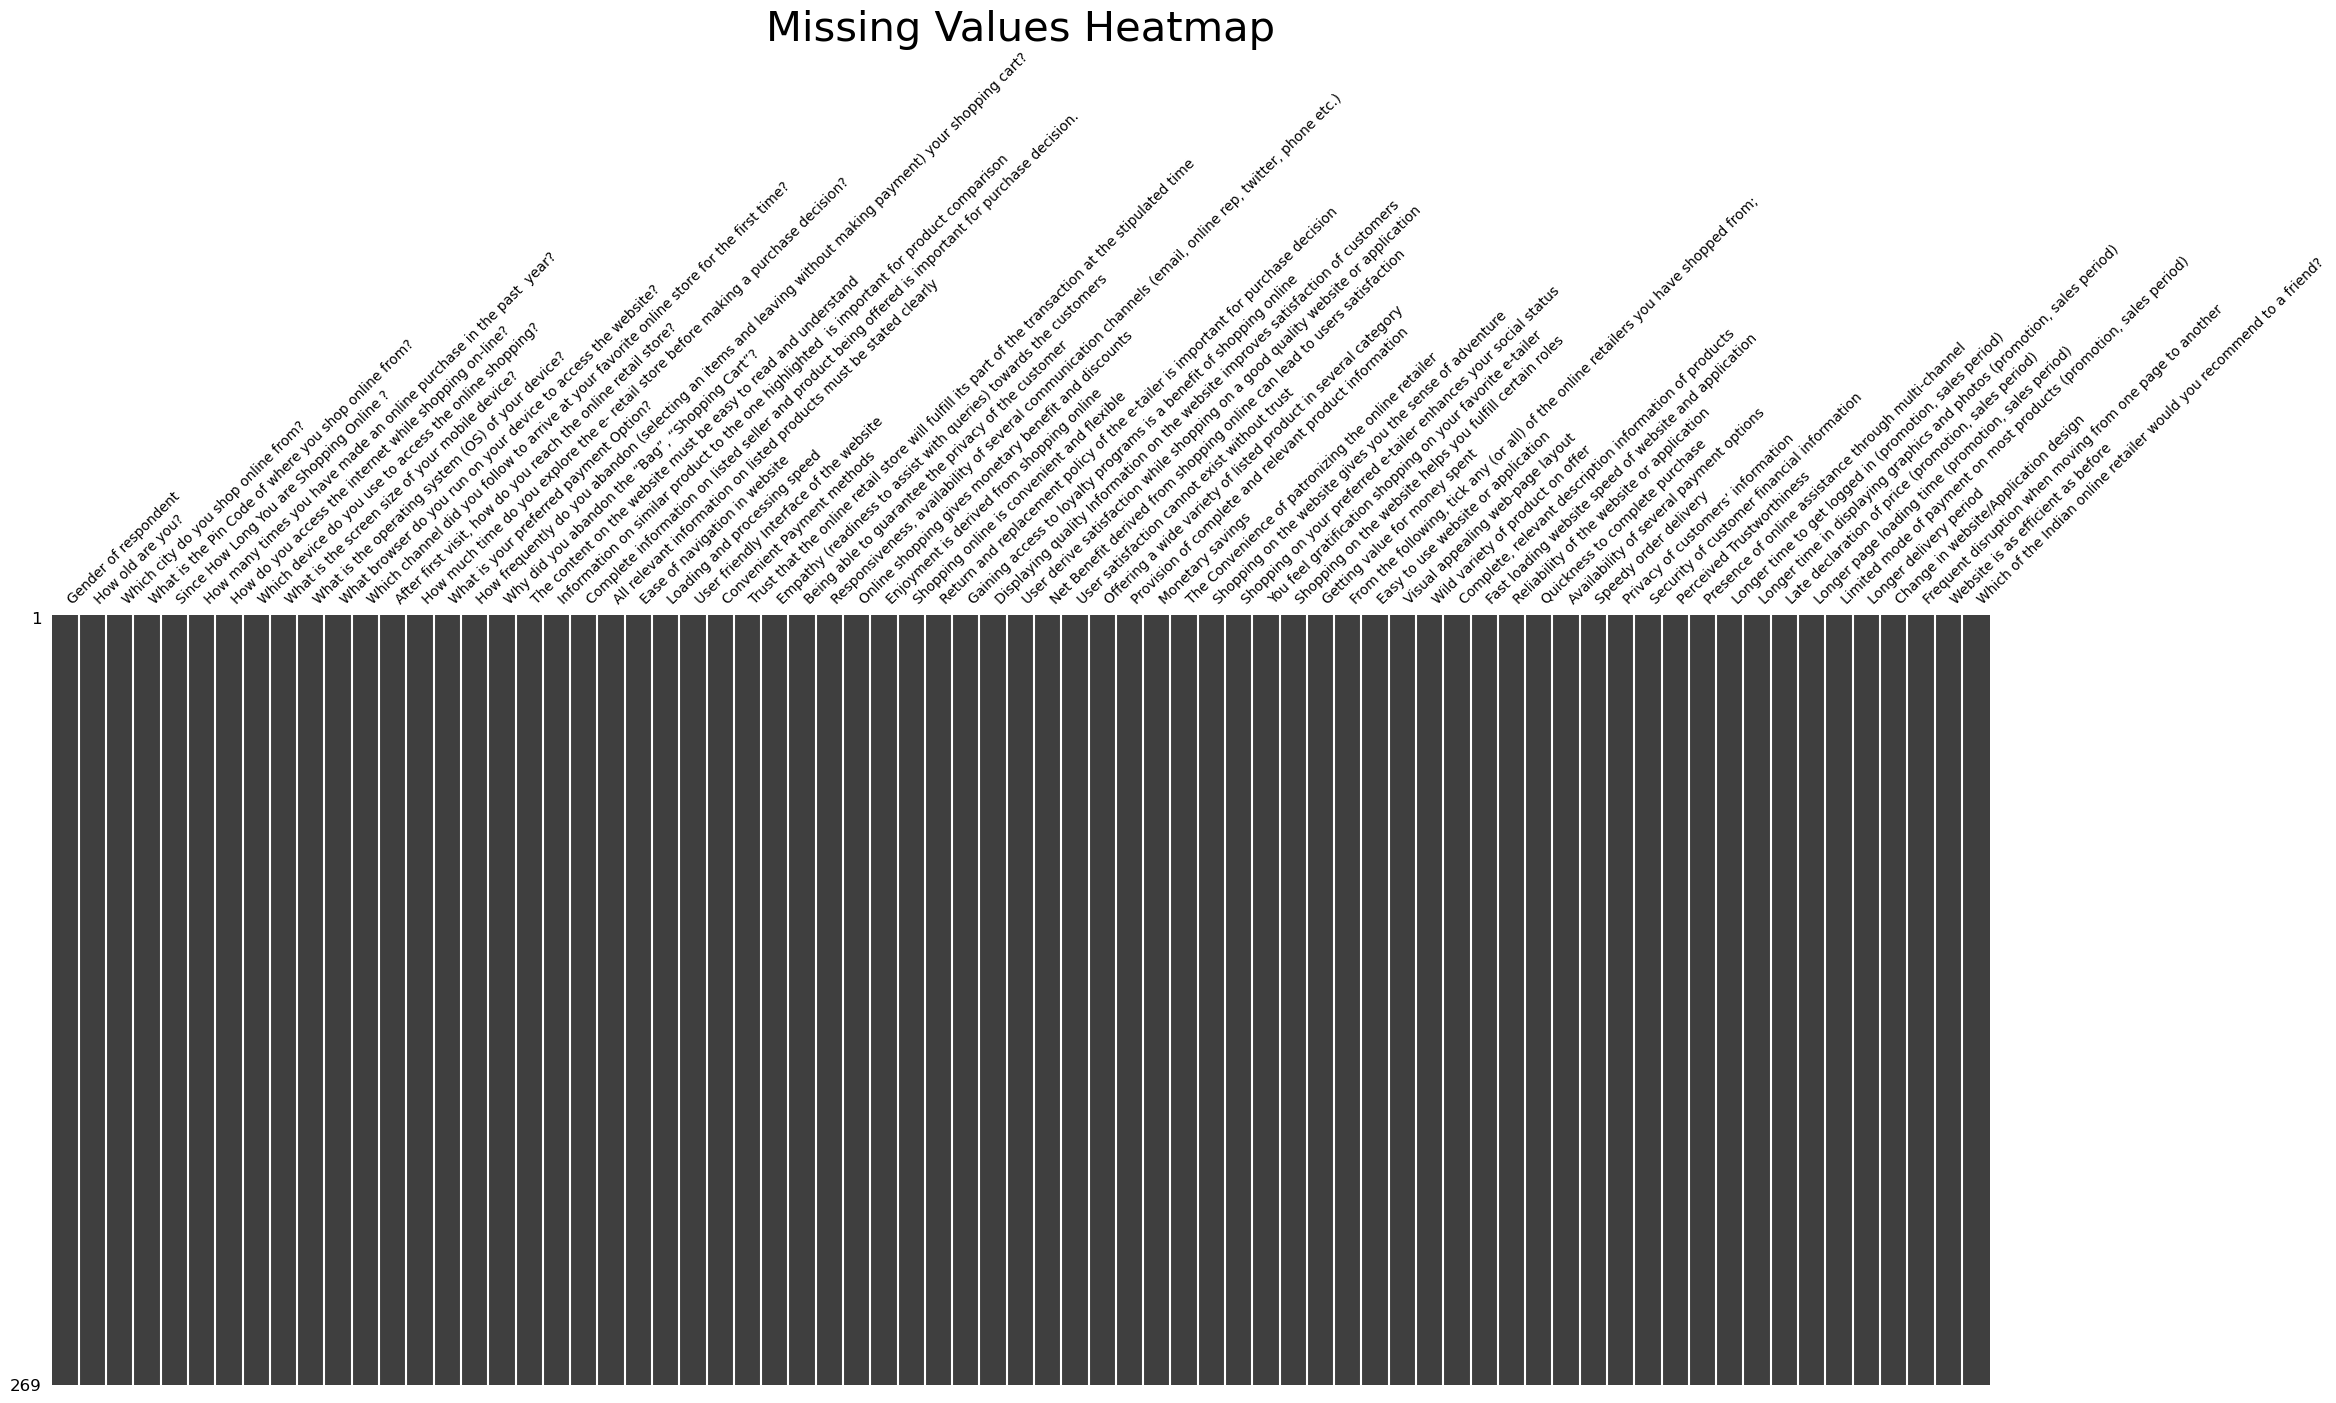

In [28]:
# Create a heatmap to visualize missing values
plt.figure(figsize=(8, 6))
msno.matrix(df, sparkline=False, fontsize=10, labels=True)
plt.title("Missing Values Heatmap", fontsize=30)
plt.show()

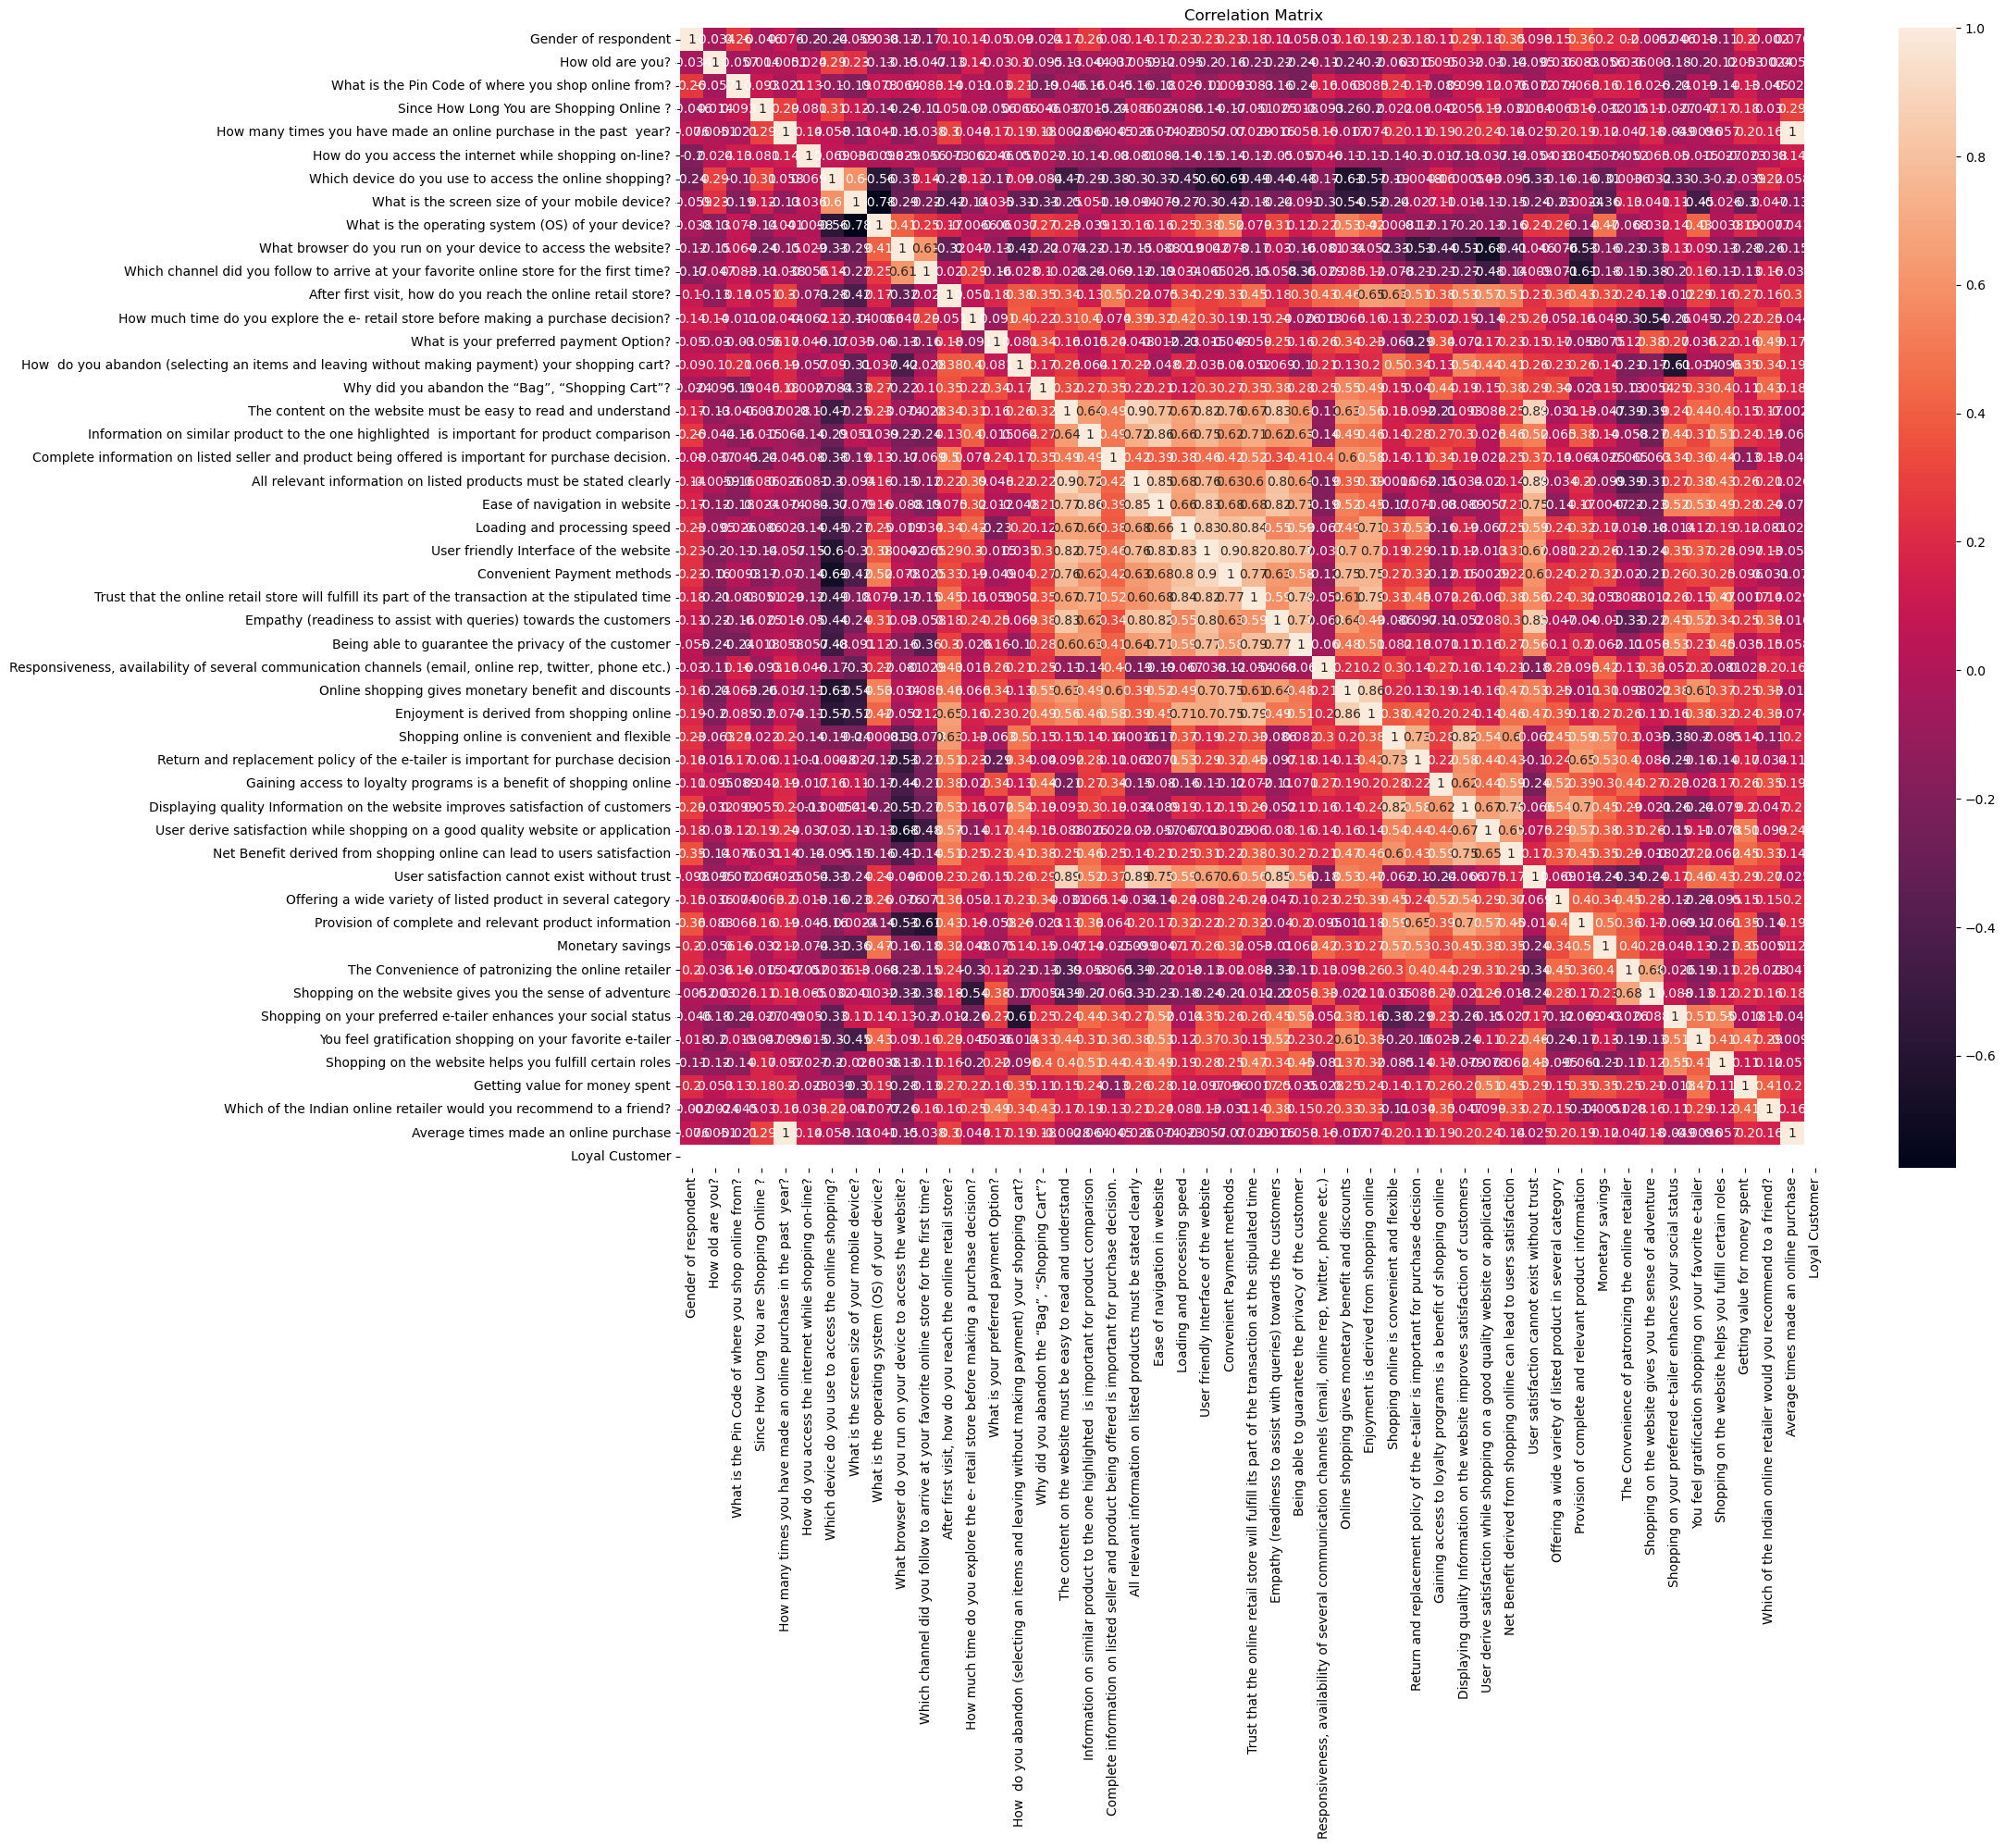

In [167]:
#corr matrix visualization
plt.figure(figsize=(20,16))
# Create a heatmap using seaborn
sns.heatmap(df.corr(), fmt='.2g', annot=True)
# Add a title to the plot
plt.title('Correlation Matrix')

# Show the plot
plt.show()

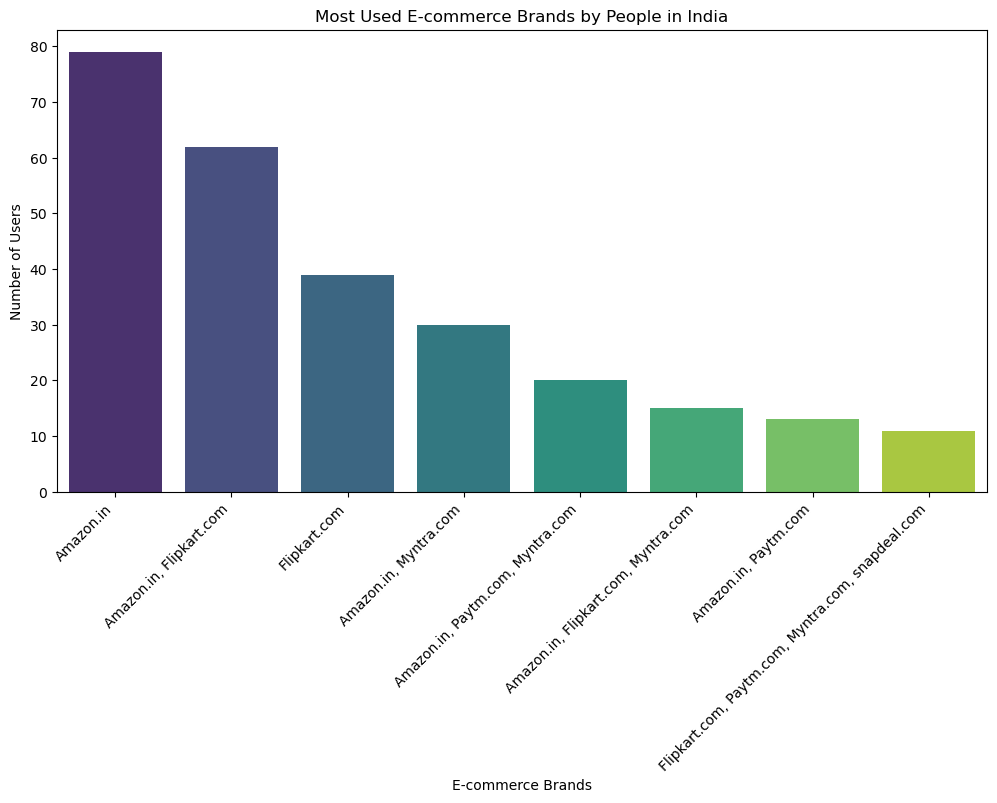

In [132]:
# Step 1: Count the occurrences of each e-commerce brand
brand_counts = df['Which of the Indian online retailer would you recommend to a friend?'].value_counts()

# Step 2: Sort the counts in descending order to get the most used brands at the top
brand_counts = brand_counts.sort_values(ascending=False)

# Step 3: Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('E-commerce Brands')
plt.ylabel('Number of Users')
plt.title('Most Used E-commerce Brands by People in India')
plt.show()

Amazon and Flipkart are the most widely used e-commerce brands among Indians.

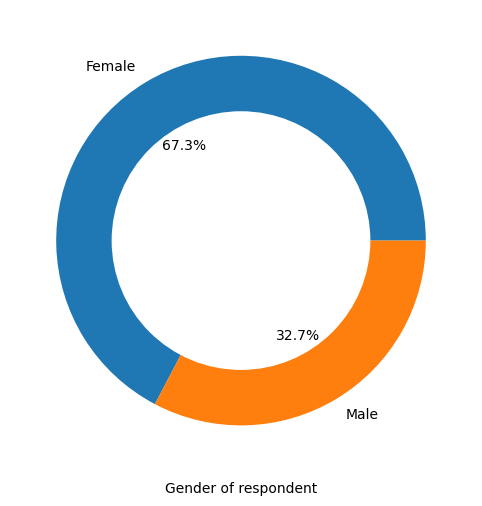

<Figure size 640x480 with 0 Axes>

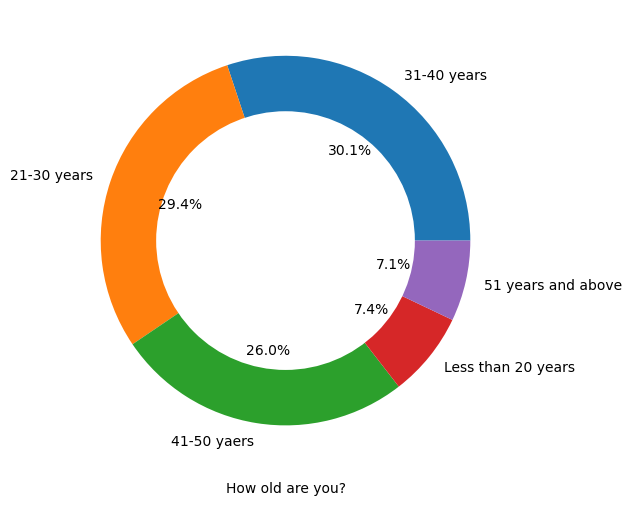

<Figure size 640x480 with 0 Axes>

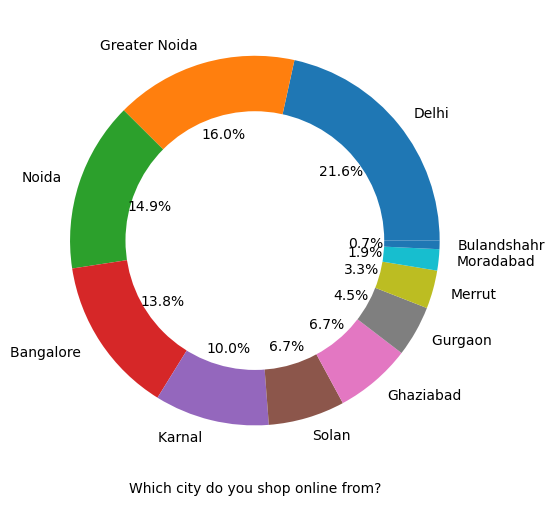

<Figure size 640x480 with 0 Axes>

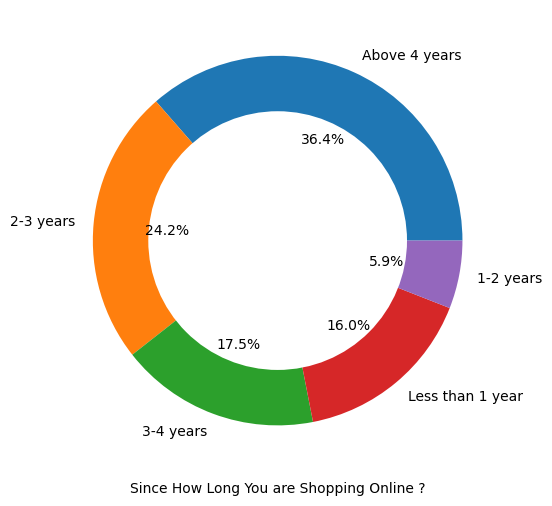

<Figure size 640x480 with 0 Axes>

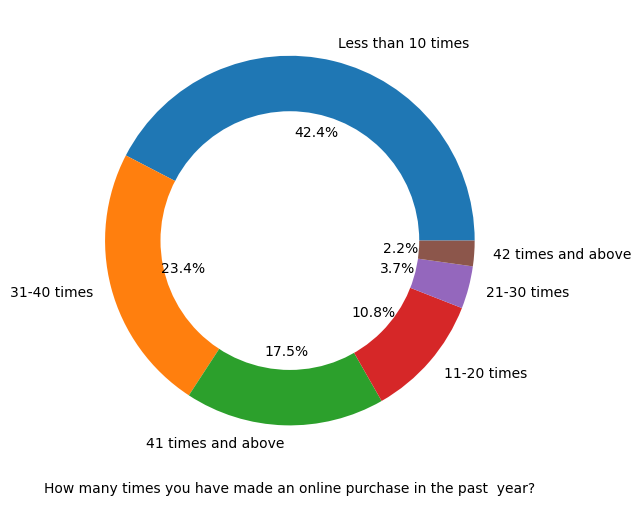

<Figure size 640x480 with 0 Axes>

In [29]:
# Lets Check first customer's personal information
customers_info=['Gender of respondent','How old are you?','Which city do you shop online from?',
               'What is the Pin Code of where you shop online from?','Since How Long You are Shopping Online ?',
                   'How many times you have made an online purchase in the past  year?']
               

# Loop through columns and create count plots

for i in customers_info:
    if i!='What is the Pin Code of where you shop online from?':
        plt.figure(figsize=(8,6))
        df[i].value_counts().plot.pie(autopct='%1.1f%%')
        centre=plt.Circle((0,0),0.7,fc='white')
        fig=plt.gcf()
        fig.gca().add_artist(centre)
        plt.xlabel(i)
        plt.ylabel('')
        plt.figure()

1.The majority of respondents in the e-commerce survey were female (63%), with a smaller percentage being male (33.1%).

2.The highest proportion of respondents were in the age group above 31, with 29% falling between the ages of 21 to 30, and only 7% being teenagers.

3.The top cities where respondents shop online are Delhi, Greater Noida, Noida, and Bangalore.

4.About 36% of respondents have been shopping online for more than 4 years, while around 16% are relatively new to online shopping, having shopped for less than a year.

5.the majority of respondents made an online purchase only less than in the past year, while very less respondant made an online purchase 42 times and above in the past year.

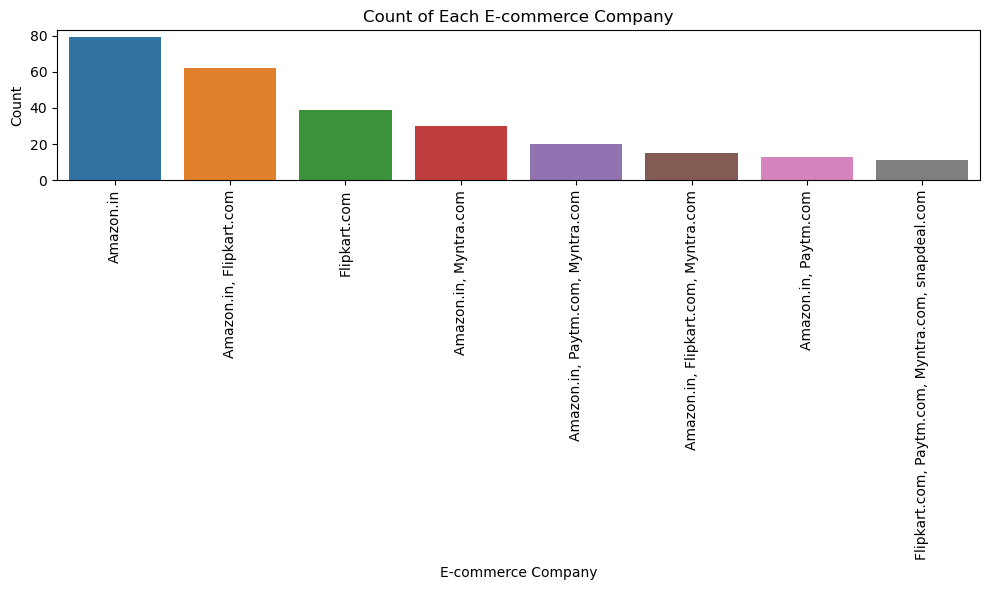

In [30]:
# Get the count of each e-commerce company
company_counts = df['Which of the Indian online retailer would you recommend to a friend?'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=company_counts.index, y=company_counts.values)
plt.xlabel('E-commerce Company')
plt.ylabel('Count')
plt.title('Count of Each E-commerce Company')
plt.xticks(rotation=90, ha='center')
plt.tight_layout()
plt.show()


Amazon.in seems to be the most popular and widely recommended e-commerce platform among the survey respondents.

In [32]:
# Resolving ambiguity in 'How many times you have made an online purchase in the past year?' column
df['How many times you have made an online purchase in the past  year?'].replace('42 times and above','41 times and above',
                                                                                inplace=True)

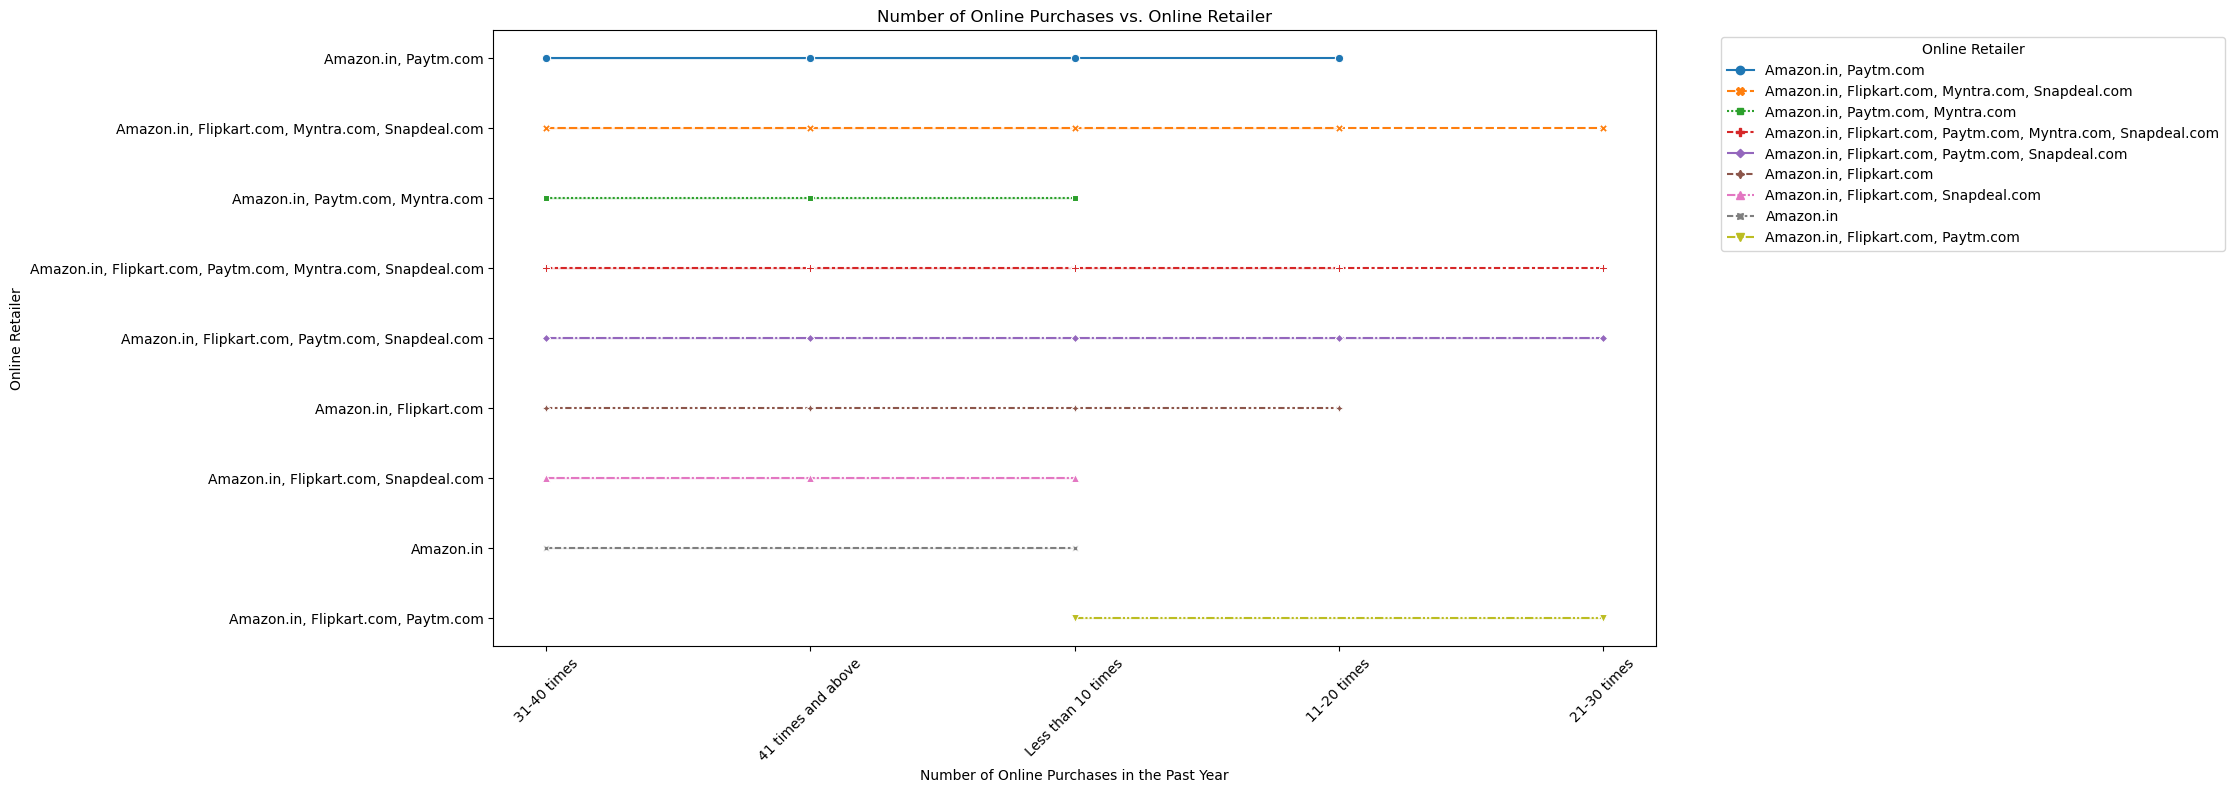

In [37]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='How many times you have made an online purchase in the past  year?',
             y='From the following, tick any (or all) of the online retailers you have shopped from;',
             hue='From the following, tick any (or all) of the online retailers you have shopped from;',
             data=df, markers=True, style='From the following, tick any (or all) of the online retailers you have shopped from;')
plt.xlabel('Number of Online Purchases in the Past Year')
plt.ylabel('Online Retailer')
plt.title('Number of Online Purchases vs. Online Retailer')
plt.xticks(rotation=45)
plt.legend(title='Online Retailer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


1.Frequent shoppers, making more than 41 purchases per year, tend to shop from all the online brands, while those with 32-40 and less than 10 purchases often exclude Myntra.

2.Regardless of the purchase frequency, people commonly shop from Amazon and Flipkart, indicating their popularity among shoppers.

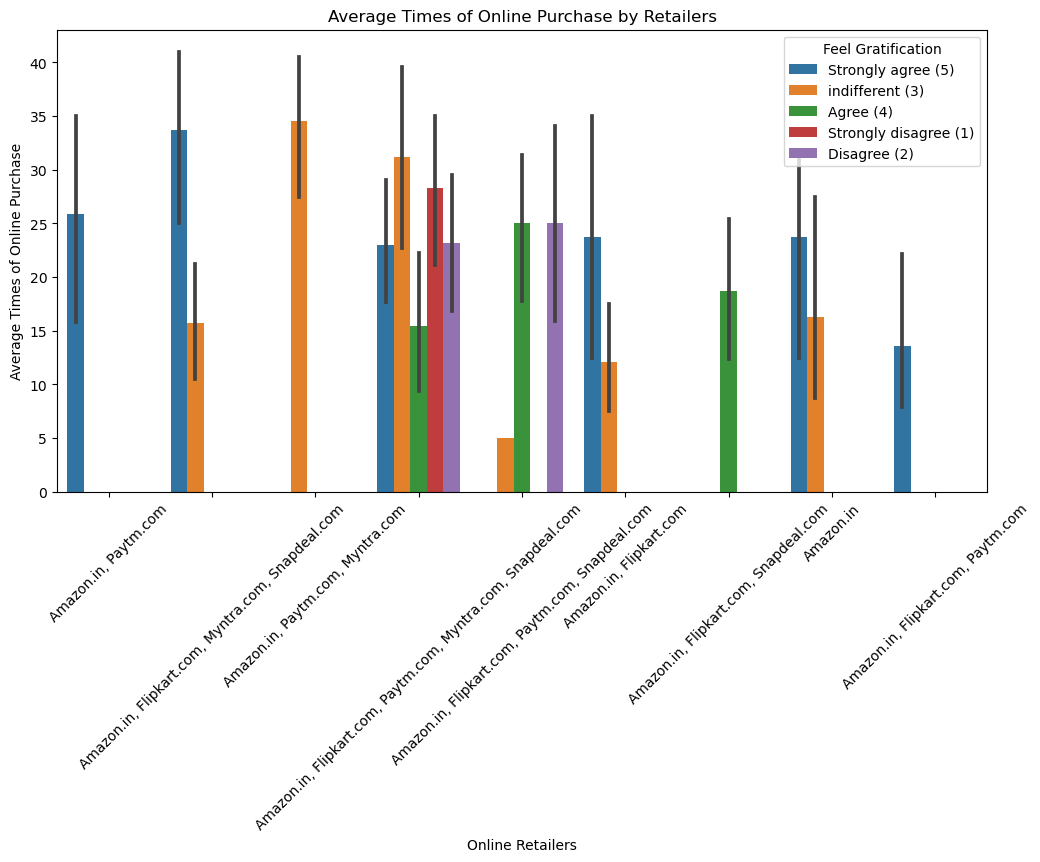

In [43]:
# Replace categories with numerical values
dict = {'31-40 times': 35, '41 times and above': 45, 'Less than 10 times': 5, '11-20 times': 15, '21-30 times': 25}
df['Average times made an online purchase'] = df['How many times you have made an online purchase in the past  year?'].replace(dict)

# Plot the bar chart with hue
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='From the following, tick any (or all) of the online retailers you have shopped from;',
            y='Average times made an online purchase',
            hue='You feel gratification shopping on your favorite e-tailer')
plt.xlabel('Online Retailers')
plt.ylabel('Average Times of Online Purchase')
plt.title('Average Times of Online Purchase by Retailers')
plt.xticks(rotation=45)
plt.legend(title='Feel Gratification')
plt.show()


Based on the bar graph, shows users who shopped from "Amazon.in" and paytm are the most satisfied, while from others brands customers are doesn't seem happy 

<Figure size 1200x600 with 0 Axes>

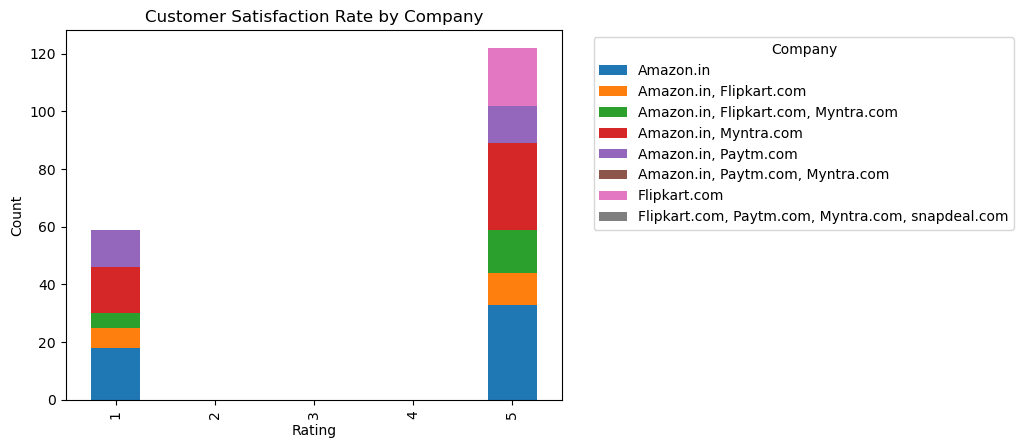

In [44]:
#Lets check the customers satisfaction rate 

# Data for the stacked bar plot
data = {
    'Amazon.in': [18.0, 0.0, 0.0, 0.0, 33.0],
    'Amazon.in, Flipkart.com': [7.0, 0.0, 0.0, 0.0, 11.0],
    'Amazon.in, Flipkart.com, Myntra.com': [5.0, 0.0, 0.0, 0.0, 15.0],
    'Amazon.in, Myntra.com': [16.0, 0.0, 0.0, 0.0, 30.0],
    'Amazon.in, Paytm.com': [13.0, 0.0, 0.0, 0.0, 13.0],
    'Amazon.in, Paytm.com, Myntra.com': [0.0, 0.0, 0.0, 0.0, 0.0],
    'Flipkart.com': [0.0, 0.0, 0.0, 0.0, 20.0],
    'Flipkart.com, Paytm.com, Myntra.com, snapdeal.com': [0.0, 0.0, 0.0, 0.0, 0.0]
}

# Create a DataFrame from the data
df = pd.DataFrame(data, index=['1', '2', '3', '4', '5'])

# Plot the stacked bar chart
plt.figure(figsize=(12, 6))
df.plot(kind='bar', stacked=True)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Customer Satisfaction Rate by Company')
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


1.Amazon is ranked the highest among the online retailers in terms of customer satisfaction, as it received the highest rating     from customers.

2.paytm is ranked the lowest among the online retailers in terms of customer satisfaction, there is an Needs Improvement

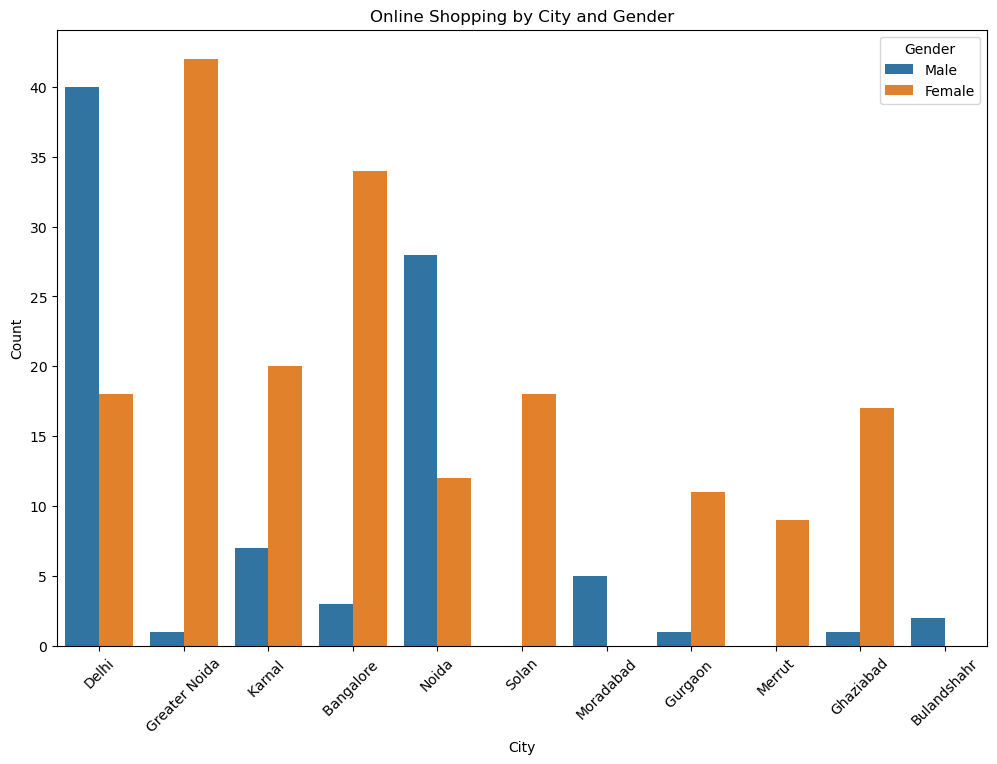

In [58]:
# Lets check shopping preference using gender
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Which city do you shop online from?', hue='Gender of respondent')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Online Shopping by City and Gender')
plt.xticks(rotation=45)
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()

1.Most of the Female who shopped from greater noida are the highest in number and male  from delhi.

2.lowest purchasing rate of females are from merrut and male from gurgaon, Ghaziabad.

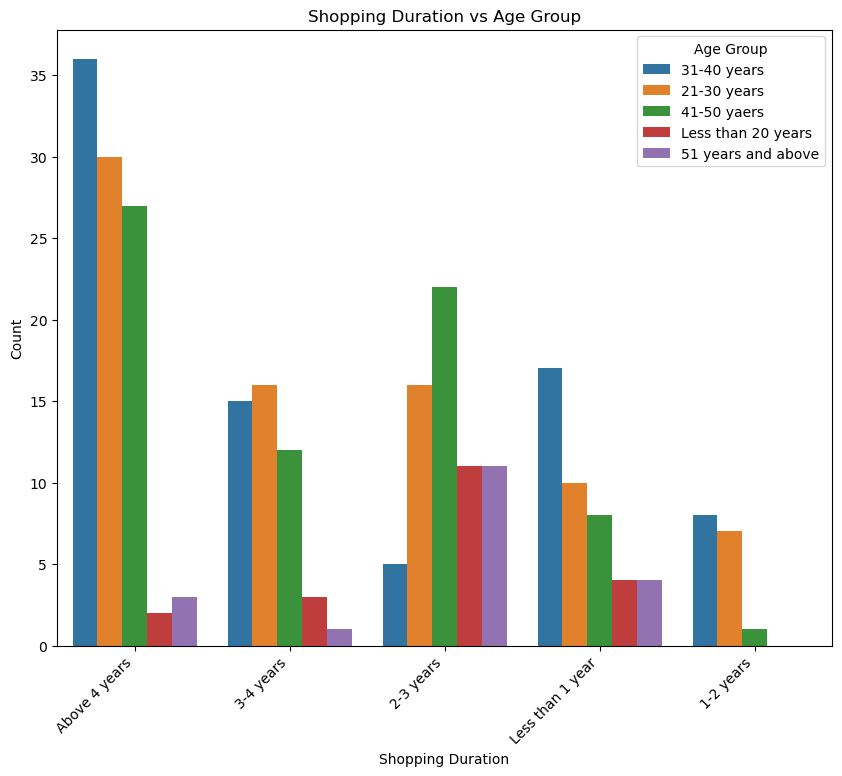

In [52]:
# Let's analyze shopping preferences based on age groups."
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Since How Long You are Shopping Online ?', hue='How old are you?')
plt.xlabel('Shopping Duration')
plt.ylabel('Count')
plt.title('Shopping Duration vs Age Group')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group', loc='upper right')
plt.show()


Above graph shows that 30 year age group people shop more than 4 years , and very less teenage (i.e.20 yr) who shop less than 1 year

<AxesSubplot:xlabel='Since How Long You are Shopping Online ?', ylabel='count'>

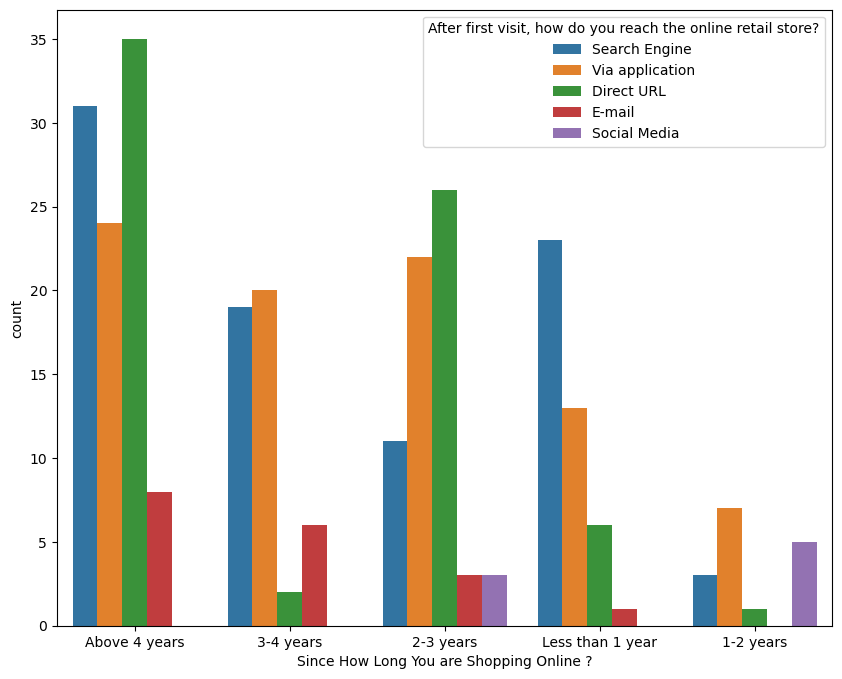

In [60]:
plt.figure(figsize=(10,8))
sns.countplot(df['Since How Long You are Shopping Online ?'],
              hue=df['After first visit, how do you reach the online retail store?'])

1.For those who shopped online for 1-2 years, most reached the stores via the application, followed by search engines and social   media.

2.For the 2-3 years shopping duration group, the majority used direct URLs to access online stores, with the application being     the second most common method.

3.Respondents with a shopping duration of 3-4 years mostly reached stores via search engines, followed by application and social   media.

4.For those who shopped online for more than 4 years, direct URLs were the most popular means of accessing online retail,         followed by search engines and social media.

5.Lastly, respondents with a shopping duration of less than 1 year also preferred direct URLs, followed by search engines and     social media.


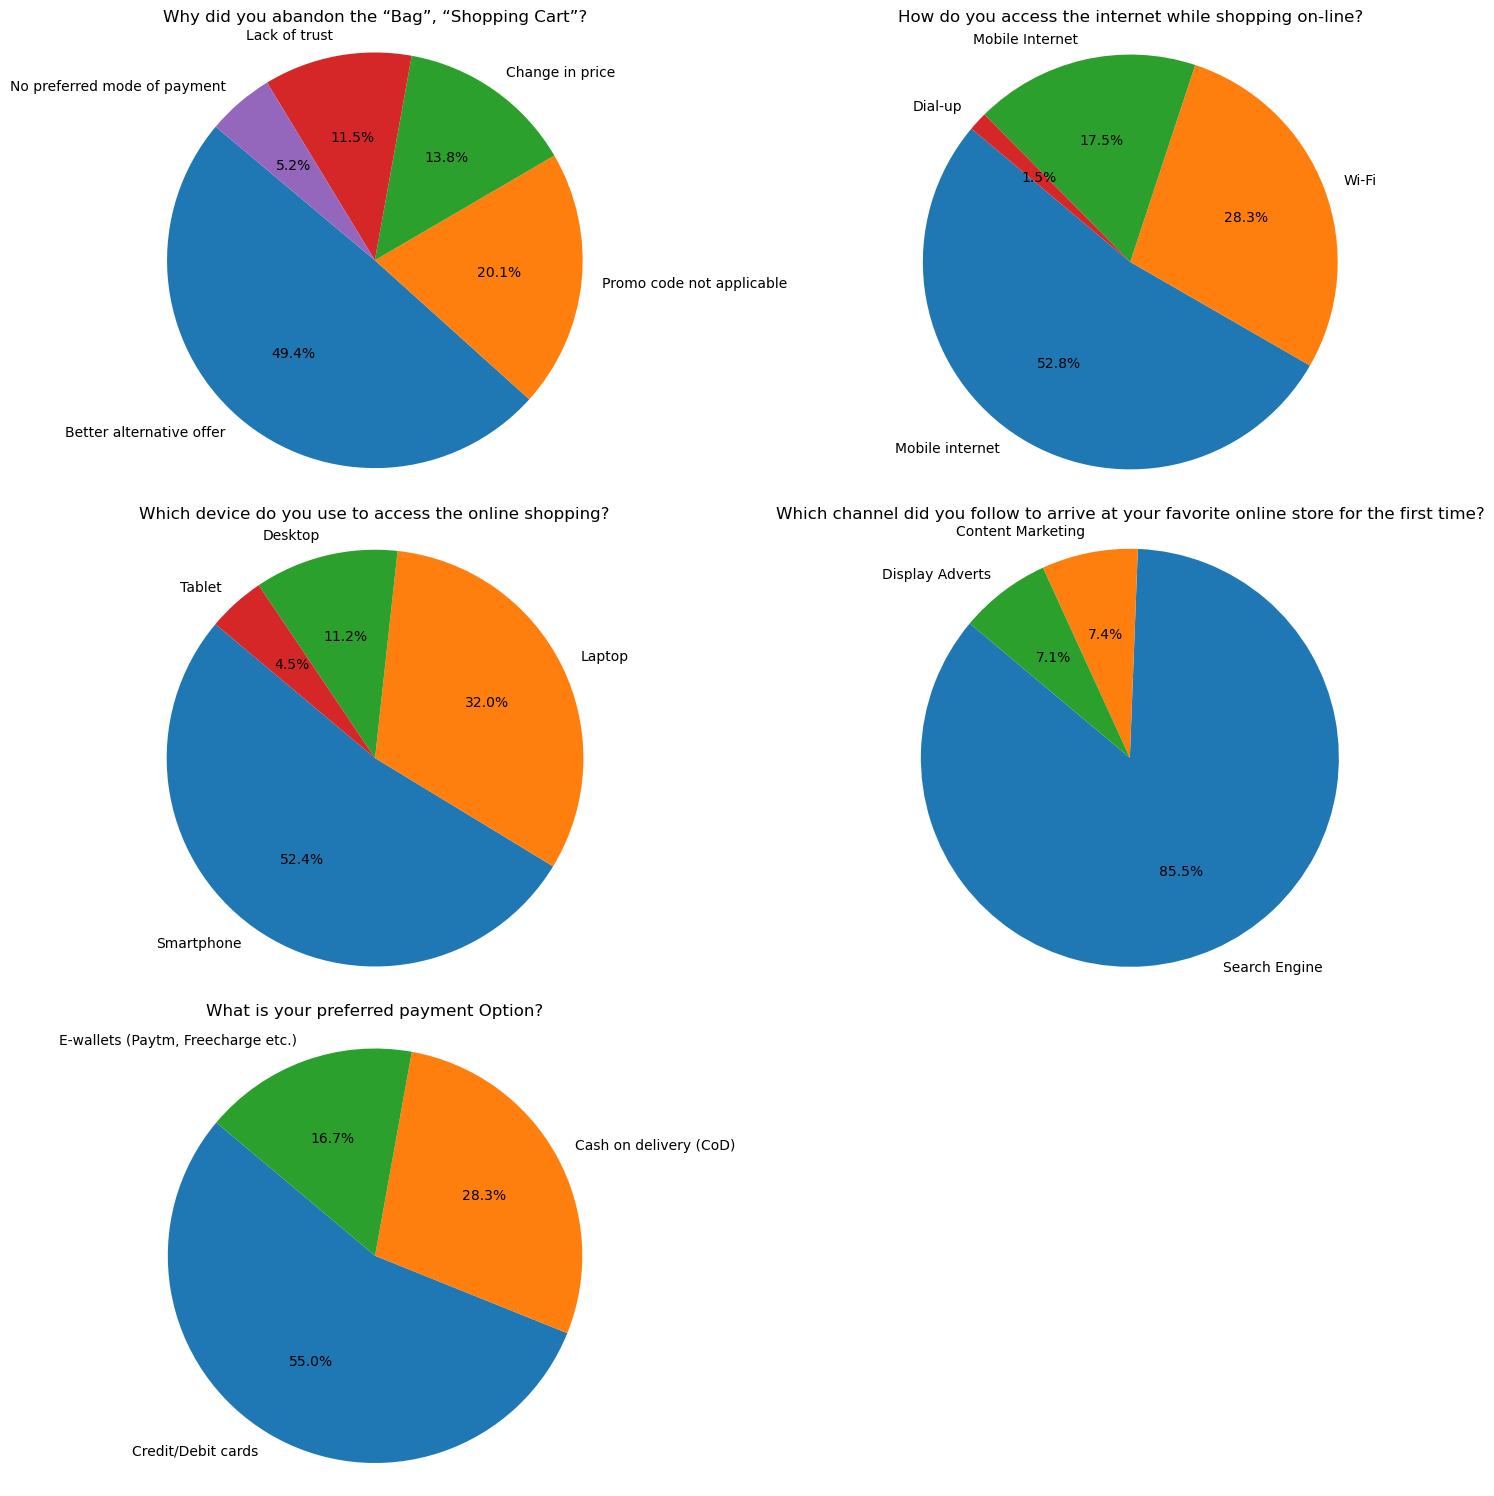

In [113]:
# Categorical columns
categorical_columns = ['Why did you abandon the “Bag”, “Shopping Cart”?',
                       'How do you access the internet while shopping on-line?',
                       'Which device do you use to access the online shopping?',
                       'Which channel did you follow to arrive at your favorite online store for the first time?',
                       'What is your preferred payment Option?']

# Create subplots for each pie chart
plt.figure(figsize=(15, 25))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(5, 2, i)
    counts = df[column].value_counts()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title(column)

plt.tight_layout()
plt.show()

1.customers who abondanded the bag because they see the alternative offer and also major reseacon is that promo code not applicable.

2.customer use mobile internet and wifi very much while doing shopping online.

3.smartphone and laptop are the both devices which is used by customers.

4.search engine is the most use channel by the customers for the shopping.

5.most preffered payment options are use by customers are credit/debit cards and cash on delivery.

In [18]:
# Lets check the brand app information
app_info=['Easy to use website or application',
       'Visual appealing web-page layout', 'Wild variety of product on offer',
       'Complete, relevant description information of products',
       'Fast loading website speed of website and application',
       'Reliability of the website or application',
       'Quickness to complete purchase',
       'Availability of several payment options', 'Speedy order delivery',
       'Privacy of customers’ information',
       'Security of customer financial information',
       'Perceived Trustworthiness',
       'Presence of online assistance through multi-channel']

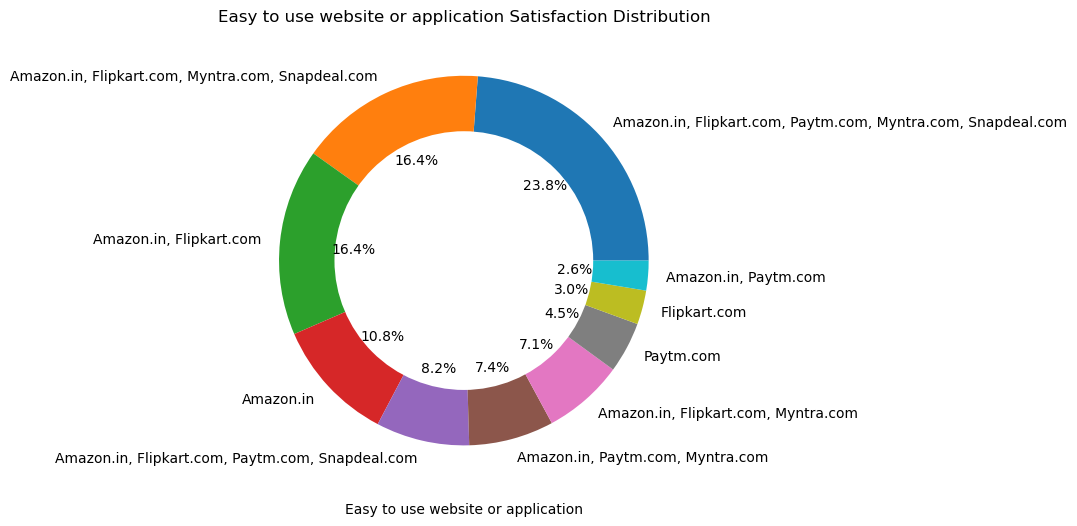

<Figure size 640x480 with 0 Axes>

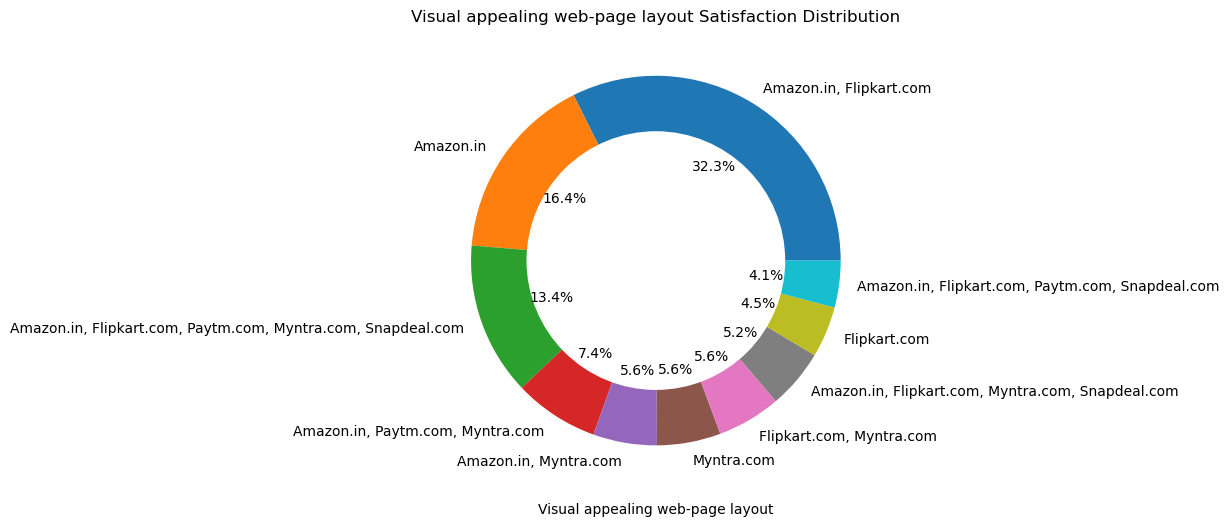

<Figure size 640x480 with 0 Axes>

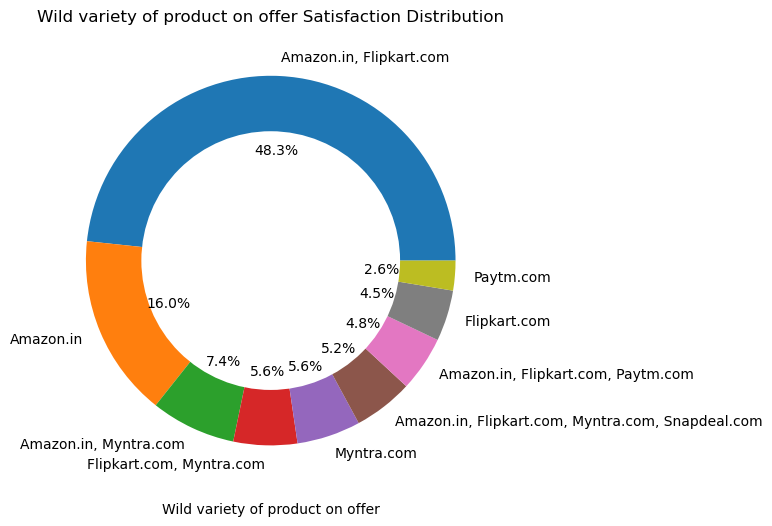

<Figure size 640x480 with 0 Axes>

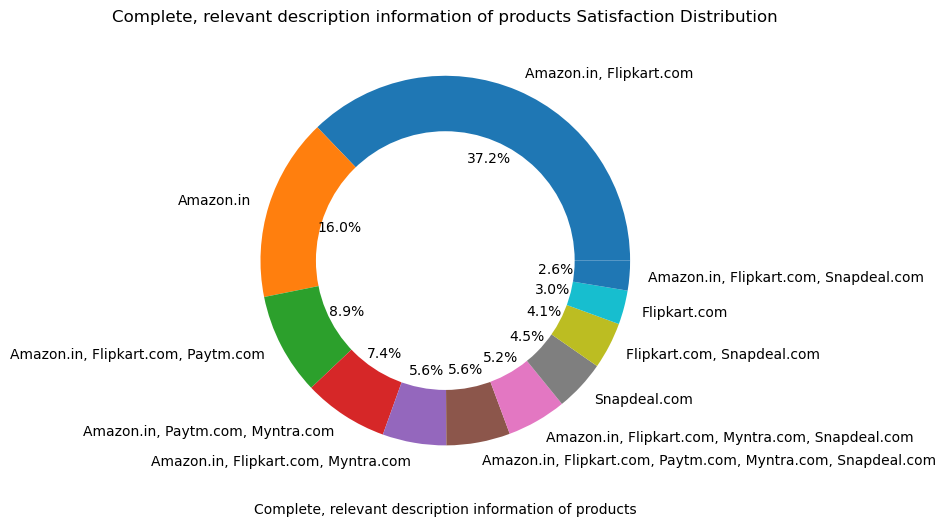

<Figure size 640x480 with 0 Axes>

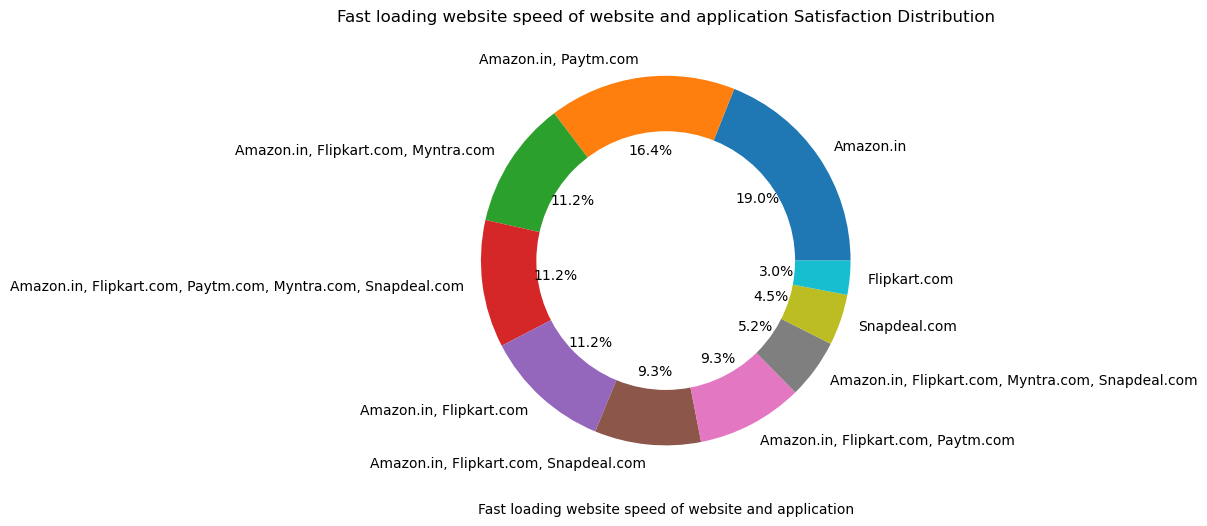

<Figure size 640x480 with 0 Axes>

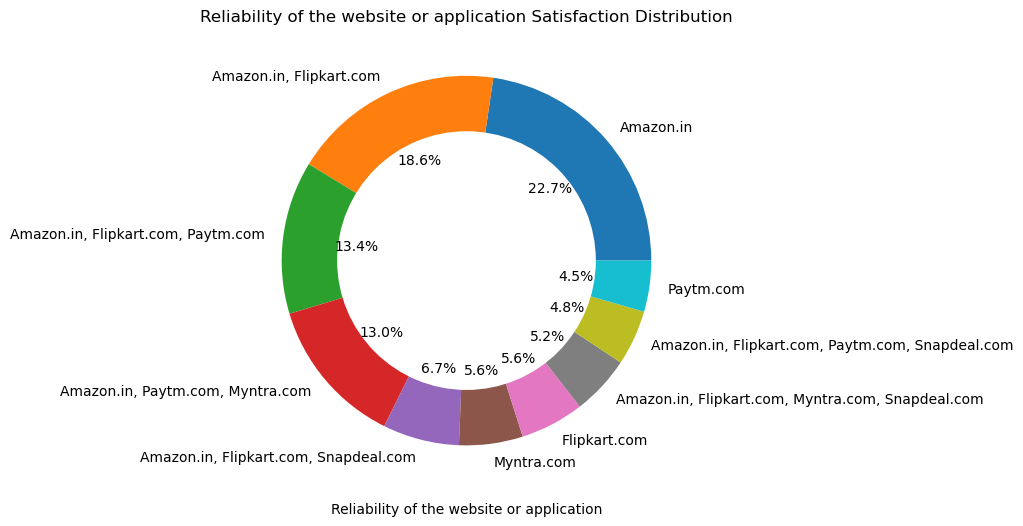

<Figure size 640x480 with 0 Axes>

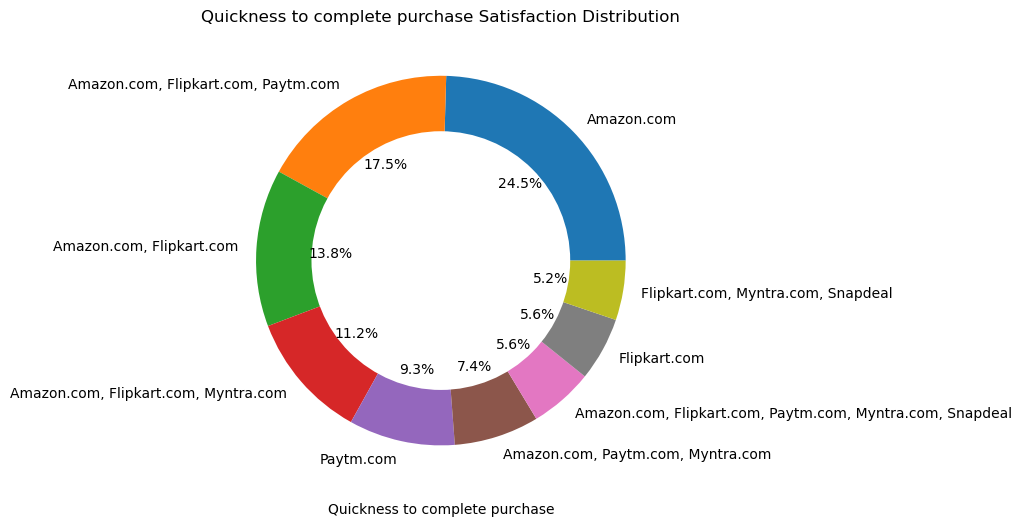

<Figure size 640x480 with 0 Axes>

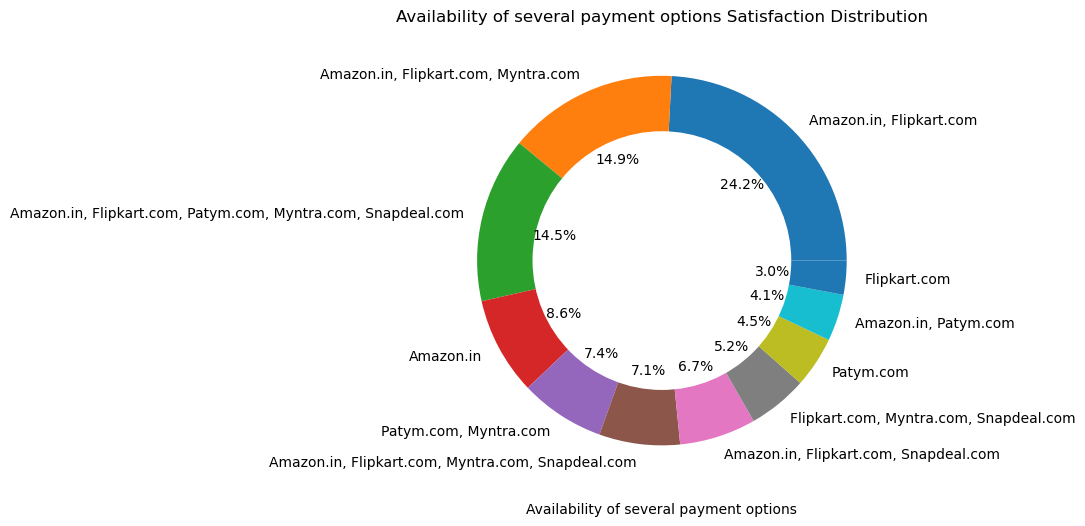

<Figure size 640x480 with 0 Axes>

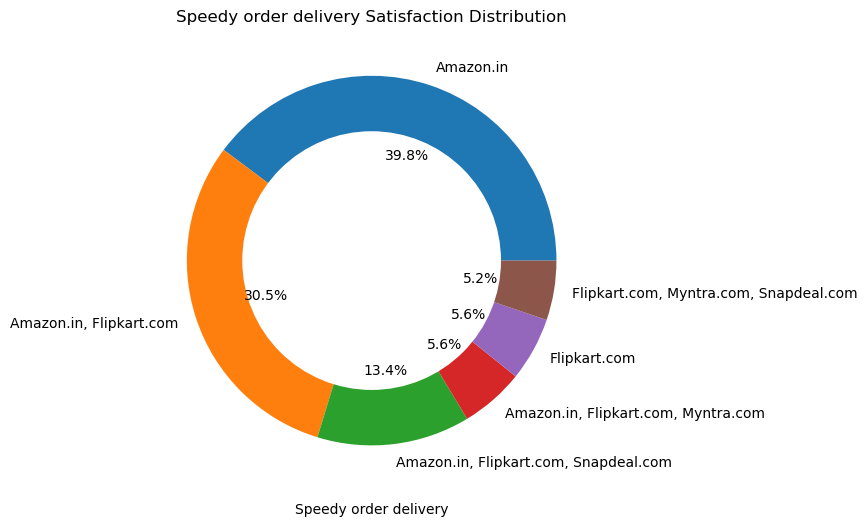

<Figure size 640x480 with 0 Axes>

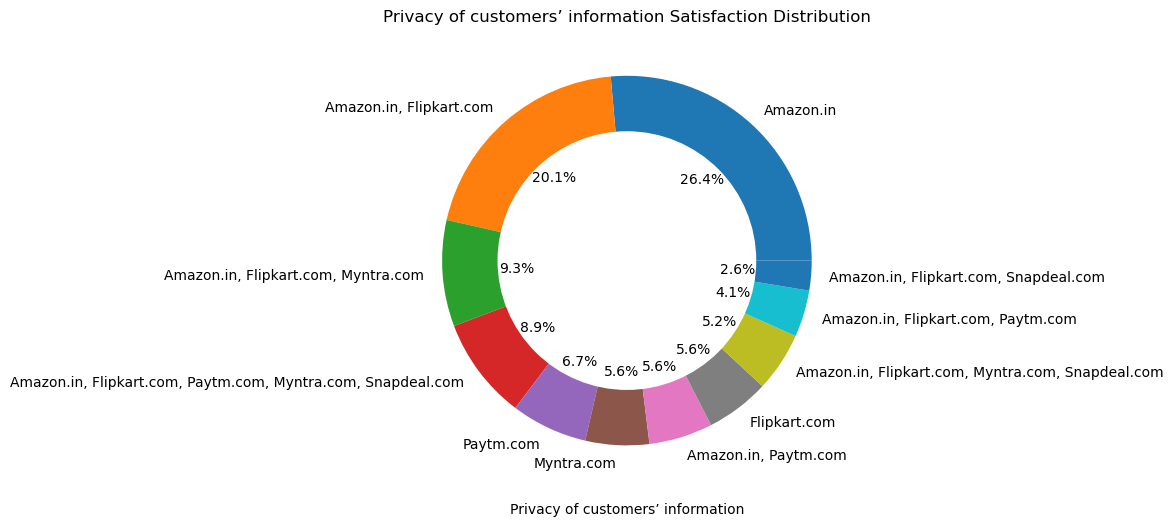

<Figure size 640x480 with 0 Axes>

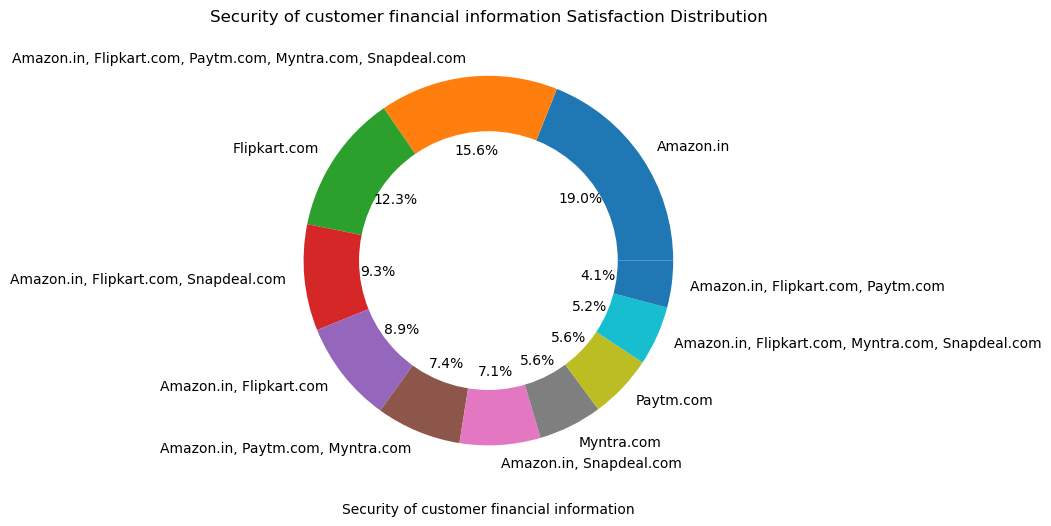

<Figure size 640x480 with 0 Axes>

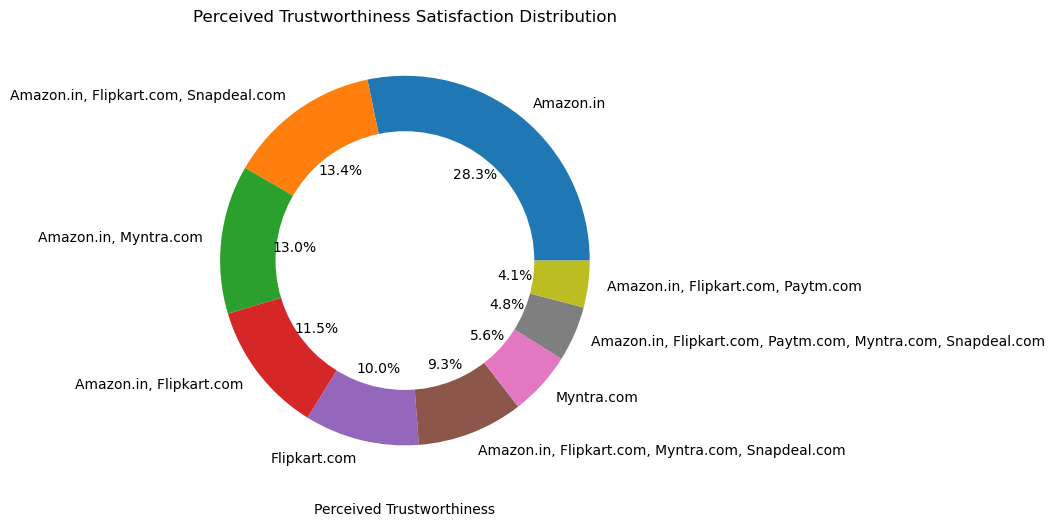

<Figure size 640x480 with 0 Axes>

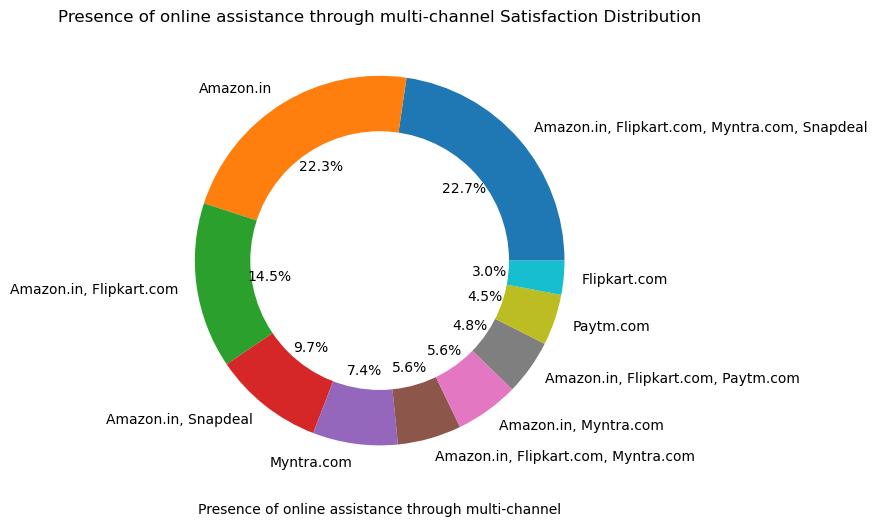

<Figure size 640x480 with 0 Axes>

In [19]:
for i in app_info:
        plt.figure(figsize=(8,6))
        df[i].value_counts().plot.pie(autopct='%1.1f%%')
        centre=plt.Circle((0,0),0.7,fc='white')
        fig=plt.gcf()
        fig.gca().add_artist(centre)
        plt.xlabel(i)
        plt.ylabel('')
        plt.title(f'{i} Satisfaction Distribution')
        plt.figure()

1.Easy to use webappliccation are Amazon, Flipkart.

2.Wild variety of product which is offer from amazon,and flipkart most.

3.Complete, and relevant description information of all products are from amazon,flipkart,and paytm.

4.Fast loading speed websties are amazon,paytm and myntra.

5.Fast completion of purchasing method branda are amazon,flipkart,paytm. which is very satisfacoty for the customers.

6.Different payment options are available in amazon,flipkart,and followed by paytm and myntra.

7.Amazon and Flipkart are known for their timely delivery of orders.

8.Privacy of the customers information are secure in Amazon, Flipkart,and Myntra.

9.Received customers satisfactory trust on amazon,flipkart, and myntra.

10.Online asistance 24/7 are provided mostly from amazon,flipkart and myntra.

In [64]:
# List of columns representing challenging experiences during promotional periods

challenging_experiences=['Longer time to get logged in (promotion, sales period)',
       'Longer time in displaying graphics and photos (promotion, sales period)',
       'Late declaration of price (promotion, sales period)',
       'Longer page loading time (promotion, sales period)',
       'Limited mode of payment on most products (promotion, sales period)',
       'Longer delivery period', 'Change in website/Application design','Website is as efficient as before',
       'Frequent disruption when moving from one page to another']

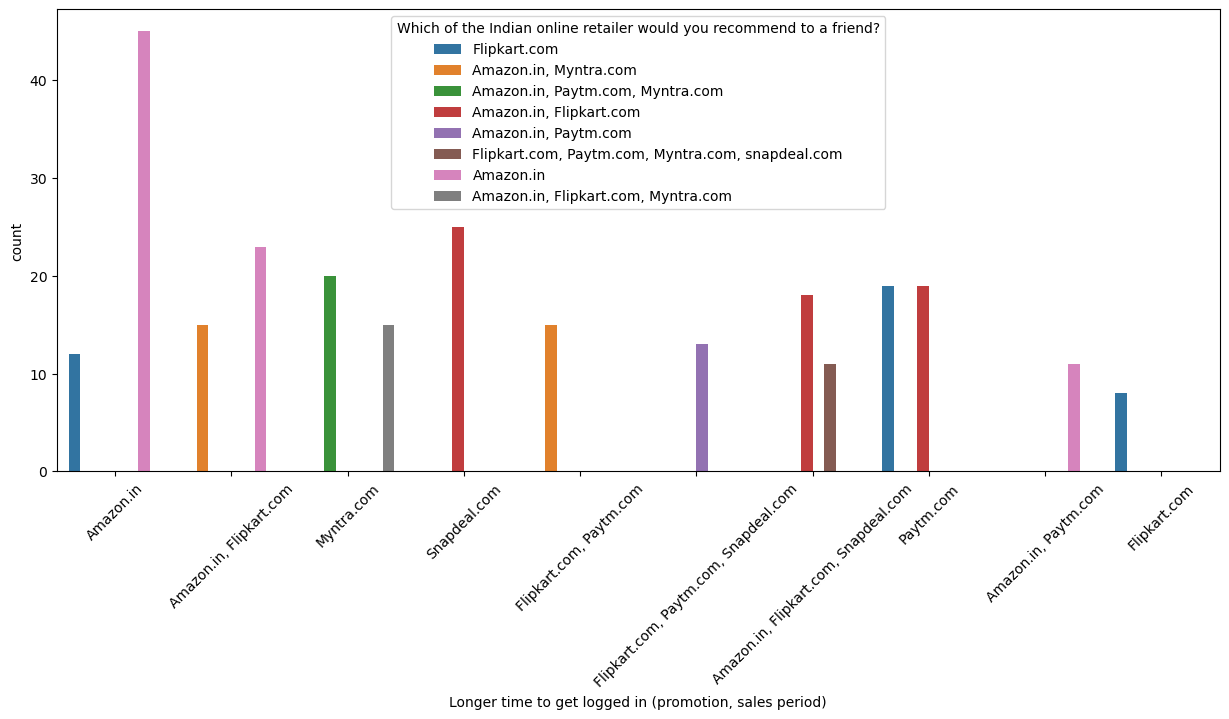

<Figure size 640x480 with 0 Axes>

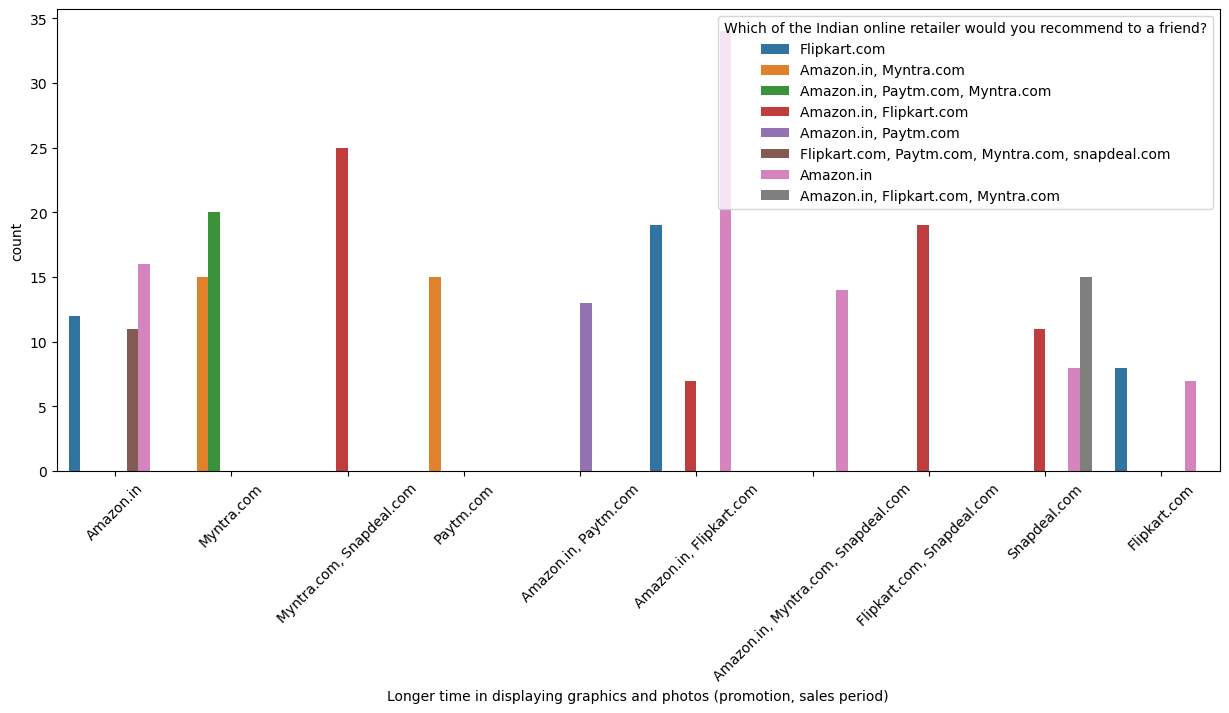

<Figure size 640x480 with 0 Axes>

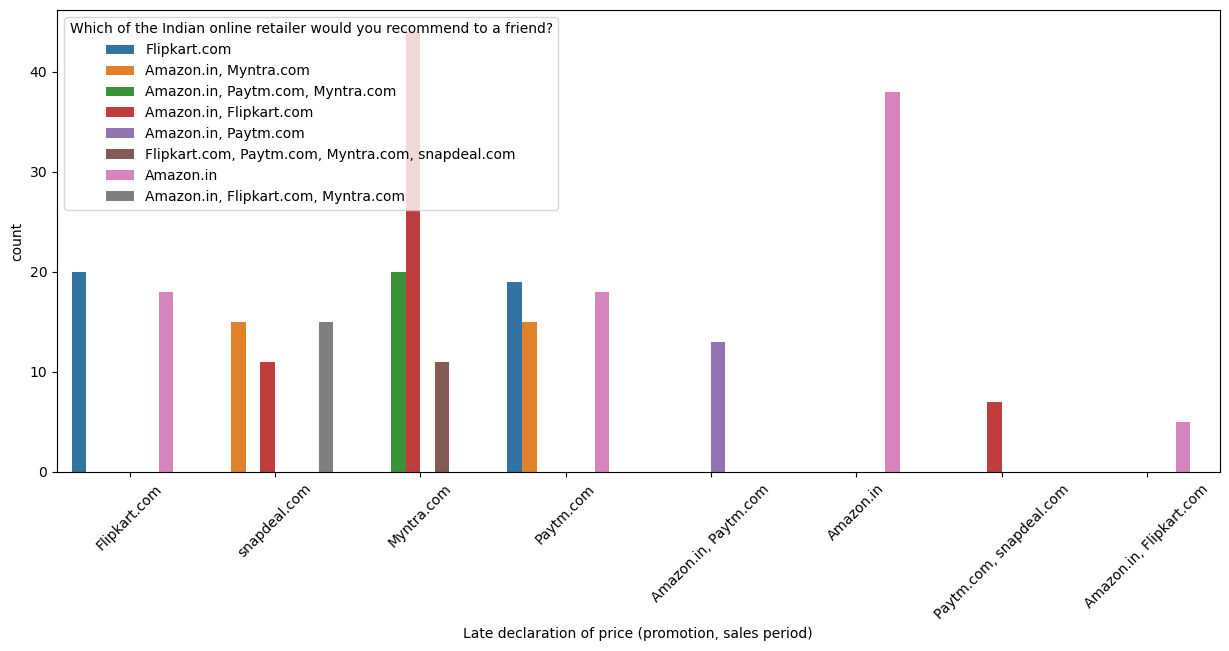

<Figure size 640x480 with 0 Axes>

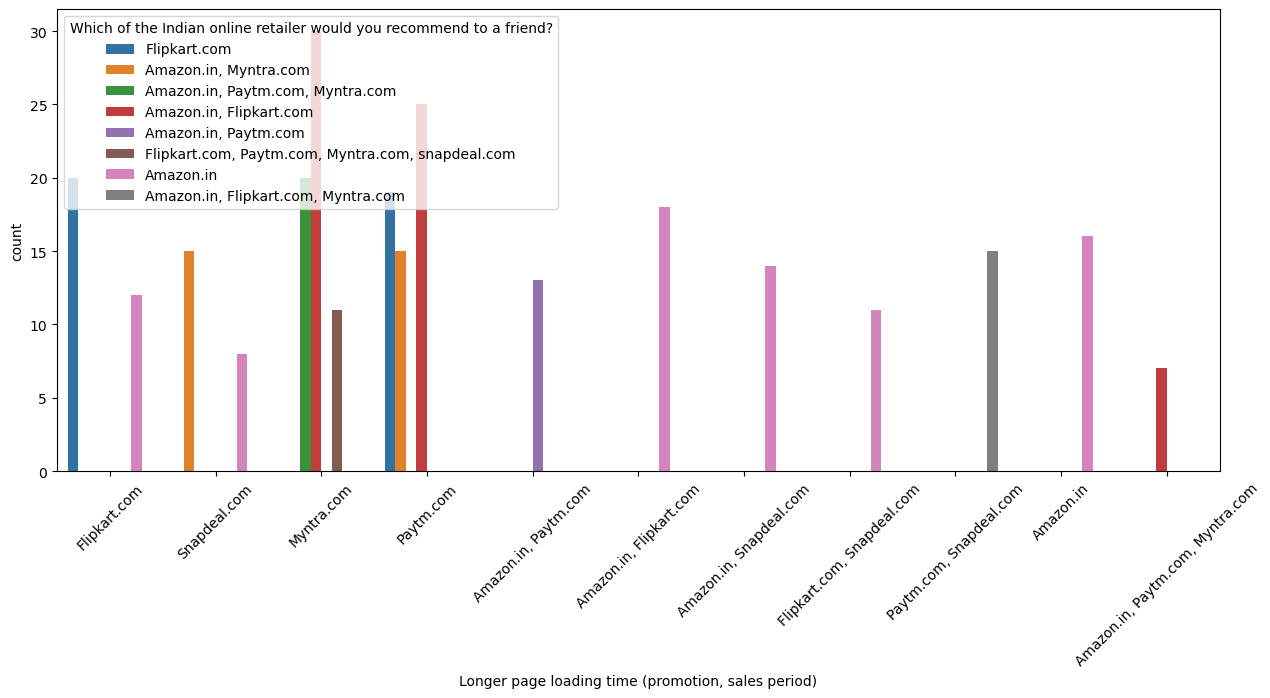

<Figure size 640x480 with 0 Axes>

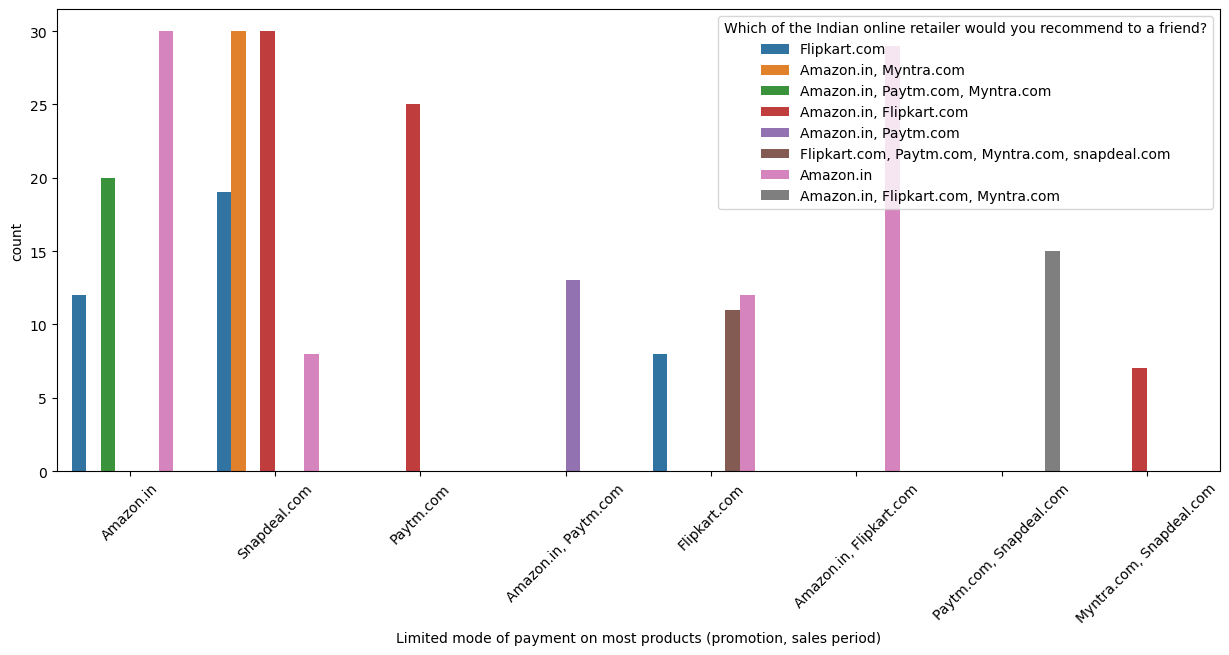

<Figure size 640x480 with 0 Axes>

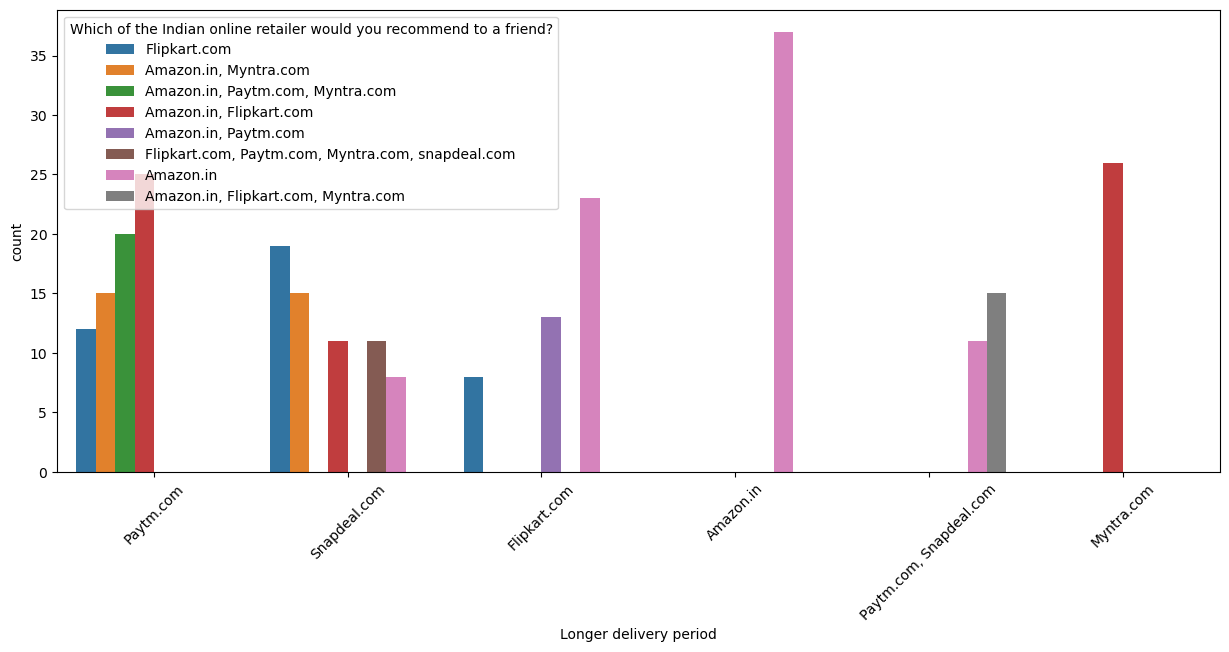

<Figure size 640x480 with 0 Axes>

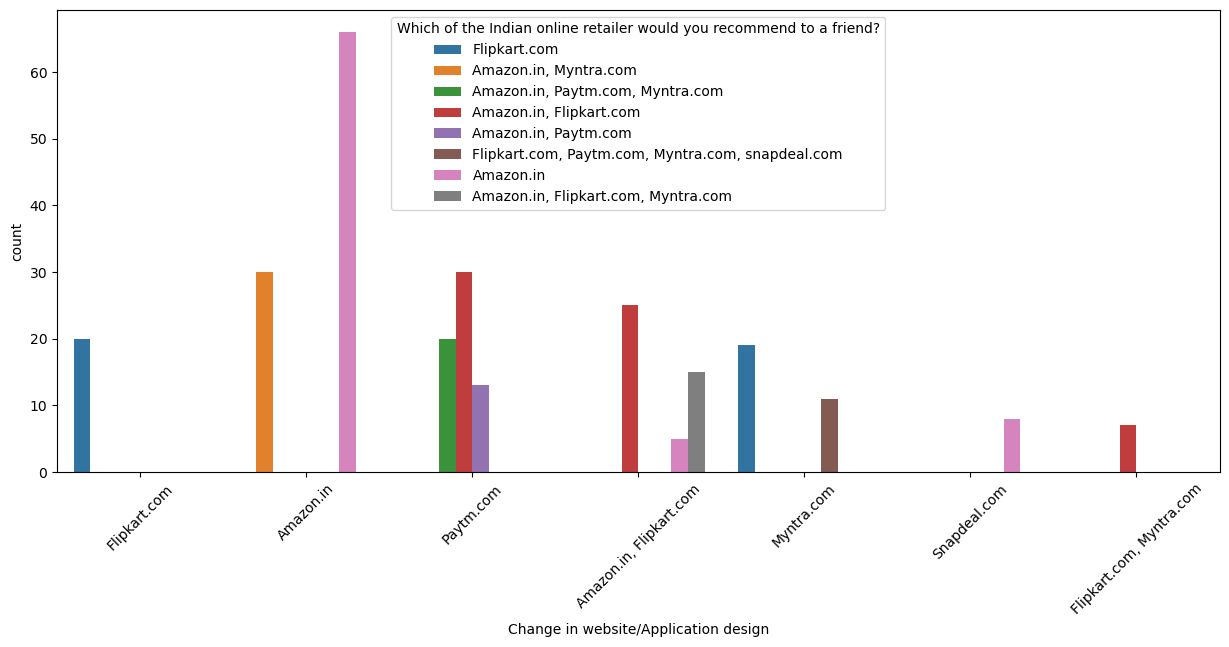

<Figure size 640x480 with 0 Axes>

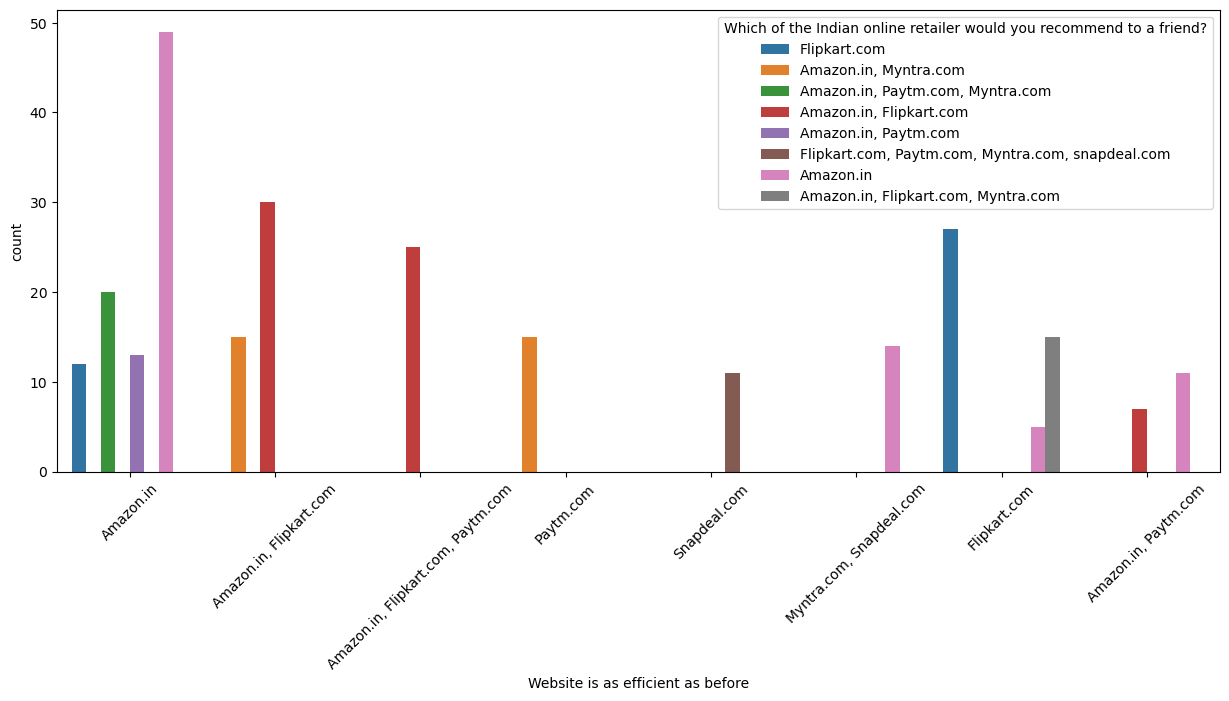

<Figure size 640x480 with 0 Axes>

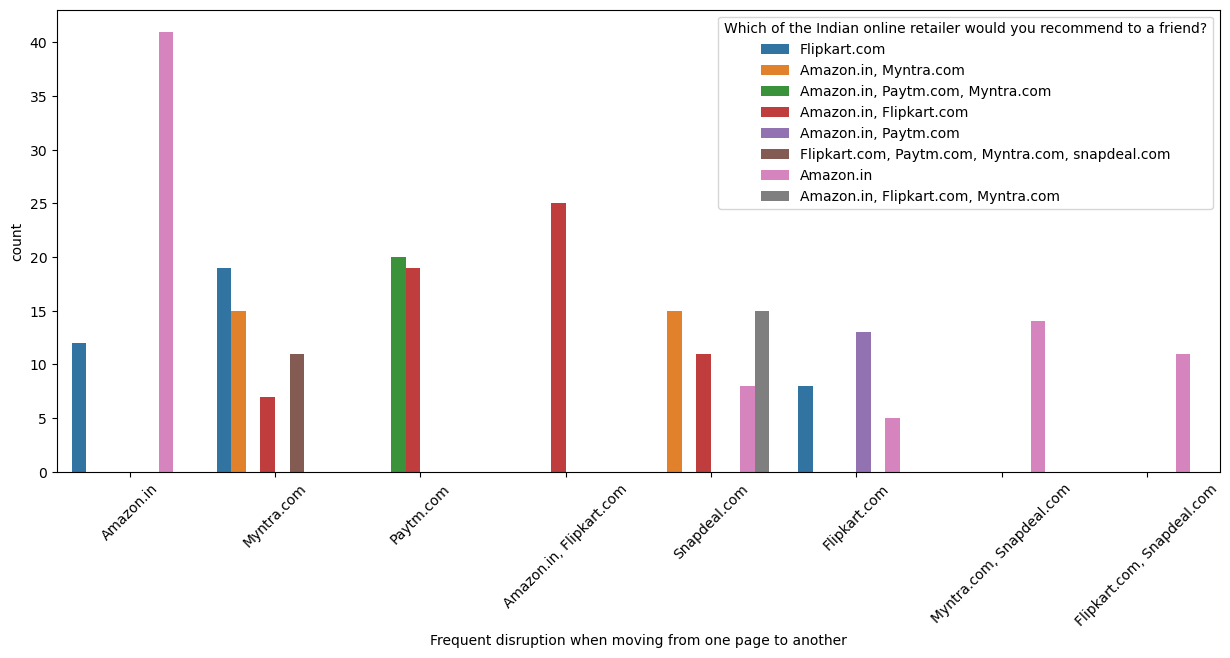

<Figure size 640x480 with 0 Axes>

In [65]:
# Loop through each challenging experience column and create a bar plot for loyal customers
for i in challenging_experiences:
        plt.figure(figsize=(15,6))
        sns.countplot(df[i],hue=df['Which of the Indian online retailer would you recommend to a friend?'])
        plt.xticks(rotation=45)
        plt.figure()

1.During promotional or sales periods, Amazon and Myntra are experiencing longer loading times for displaying graphics and  photos, which may impact the overall shopping experience for customers.

2.During promotional or sales periods, Myntra and Paytm, snapdeal are experiencing delays in declaring prices, potentially leading to customer dissatisfaction and uncertainty while making purchase decisions.

3.During promotional or sales periods, Myntra, and paytm are experiences longer page loading times, which may impact user experience and navigation on their website.

4During promotional or sales periods, Snapdeal and Amazon have the highest occurrences of limited payment options on most products, potentially affecting customer convenience and satisfaction.

5.longer delivery periods, possibly impacting customer satisfaction during promotional or sales periods.

6.Amazon, Paytm, and Flipkart exhibit a higher incidence of changes in their website or application design, which could potentially affect user experience during promotional or sales periods.

7.Customers are likely to have a more efficient and smooth shopping experience on Amazon and Flipkart websites during promotion and sales periods, which may lead to higher customer satisfaction and increased loyalty to these platforms

8.Frequent disruptions during navigation can lead to a poor user experience and potential loss of customers on Amazon,Myntra and Snapdeal.

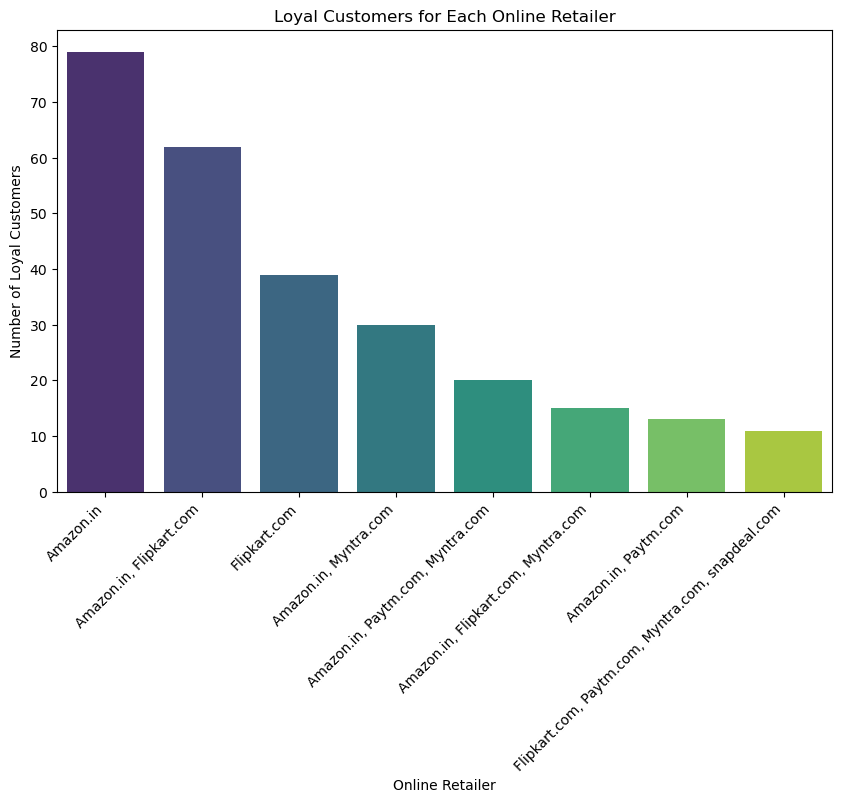

In [69]:
# Group by the preferred online retailer and count the number of respondents for each retailer
loyalty_counts = df['Which of the Indian online retailer would you recommend to a friend?'].value_counts()

# Plot the bar chart to visualize the loyalty counts for each brand
plt.figure(figsize=(10, 6))
sns.barplot(x=loyalty_counts.index, y=loyalty_counts.values, palette='viridis')
plt.xlabel('Online Retailer')
plt.ylabel('Number of Loyal Customers')
plt.title('Loyal Customers for Each Online Retailer')
plt.xticks(rotation=45, ha='right')
plt.show()


Loyal customers are primarily for Amazon, Flipkart, and Myntra, while other online retailers need to focus on improving their customer loyalty.

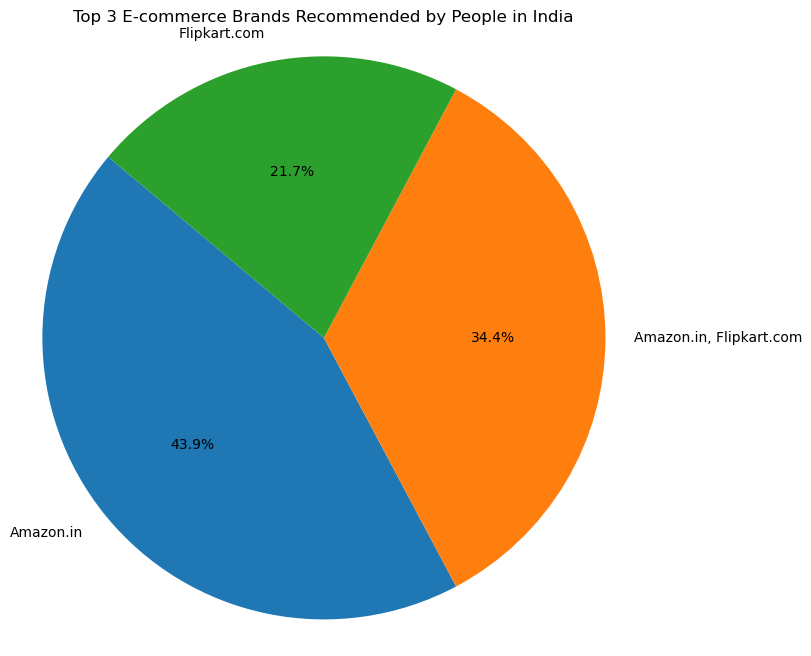

In [66]:
# Count the number of users for each e-commerce platform
brand_counts = df['Which of the Indian online retailer would you recommend to a friend?'].value_counts()

# Sort the counts in descending order
sorted_brands = brand_counts.sort_values(ascending=False)

# Get the top 3 brands
top_3_brands = sorted_brands.head(3)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_3_brands.values, labels=top_3_brands.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Top 3 E-commerce Brands Recommended by People in India')
plt.show()



Among the top three e-commerce brands, 43.9% recommended Amazon.in, 34.4% recommended both Amazon.in and Flipkart.com, and 21.7% recommended Flipkart.com

## By focusing on following areas, E-commerce brands can enhance customer satisfaction

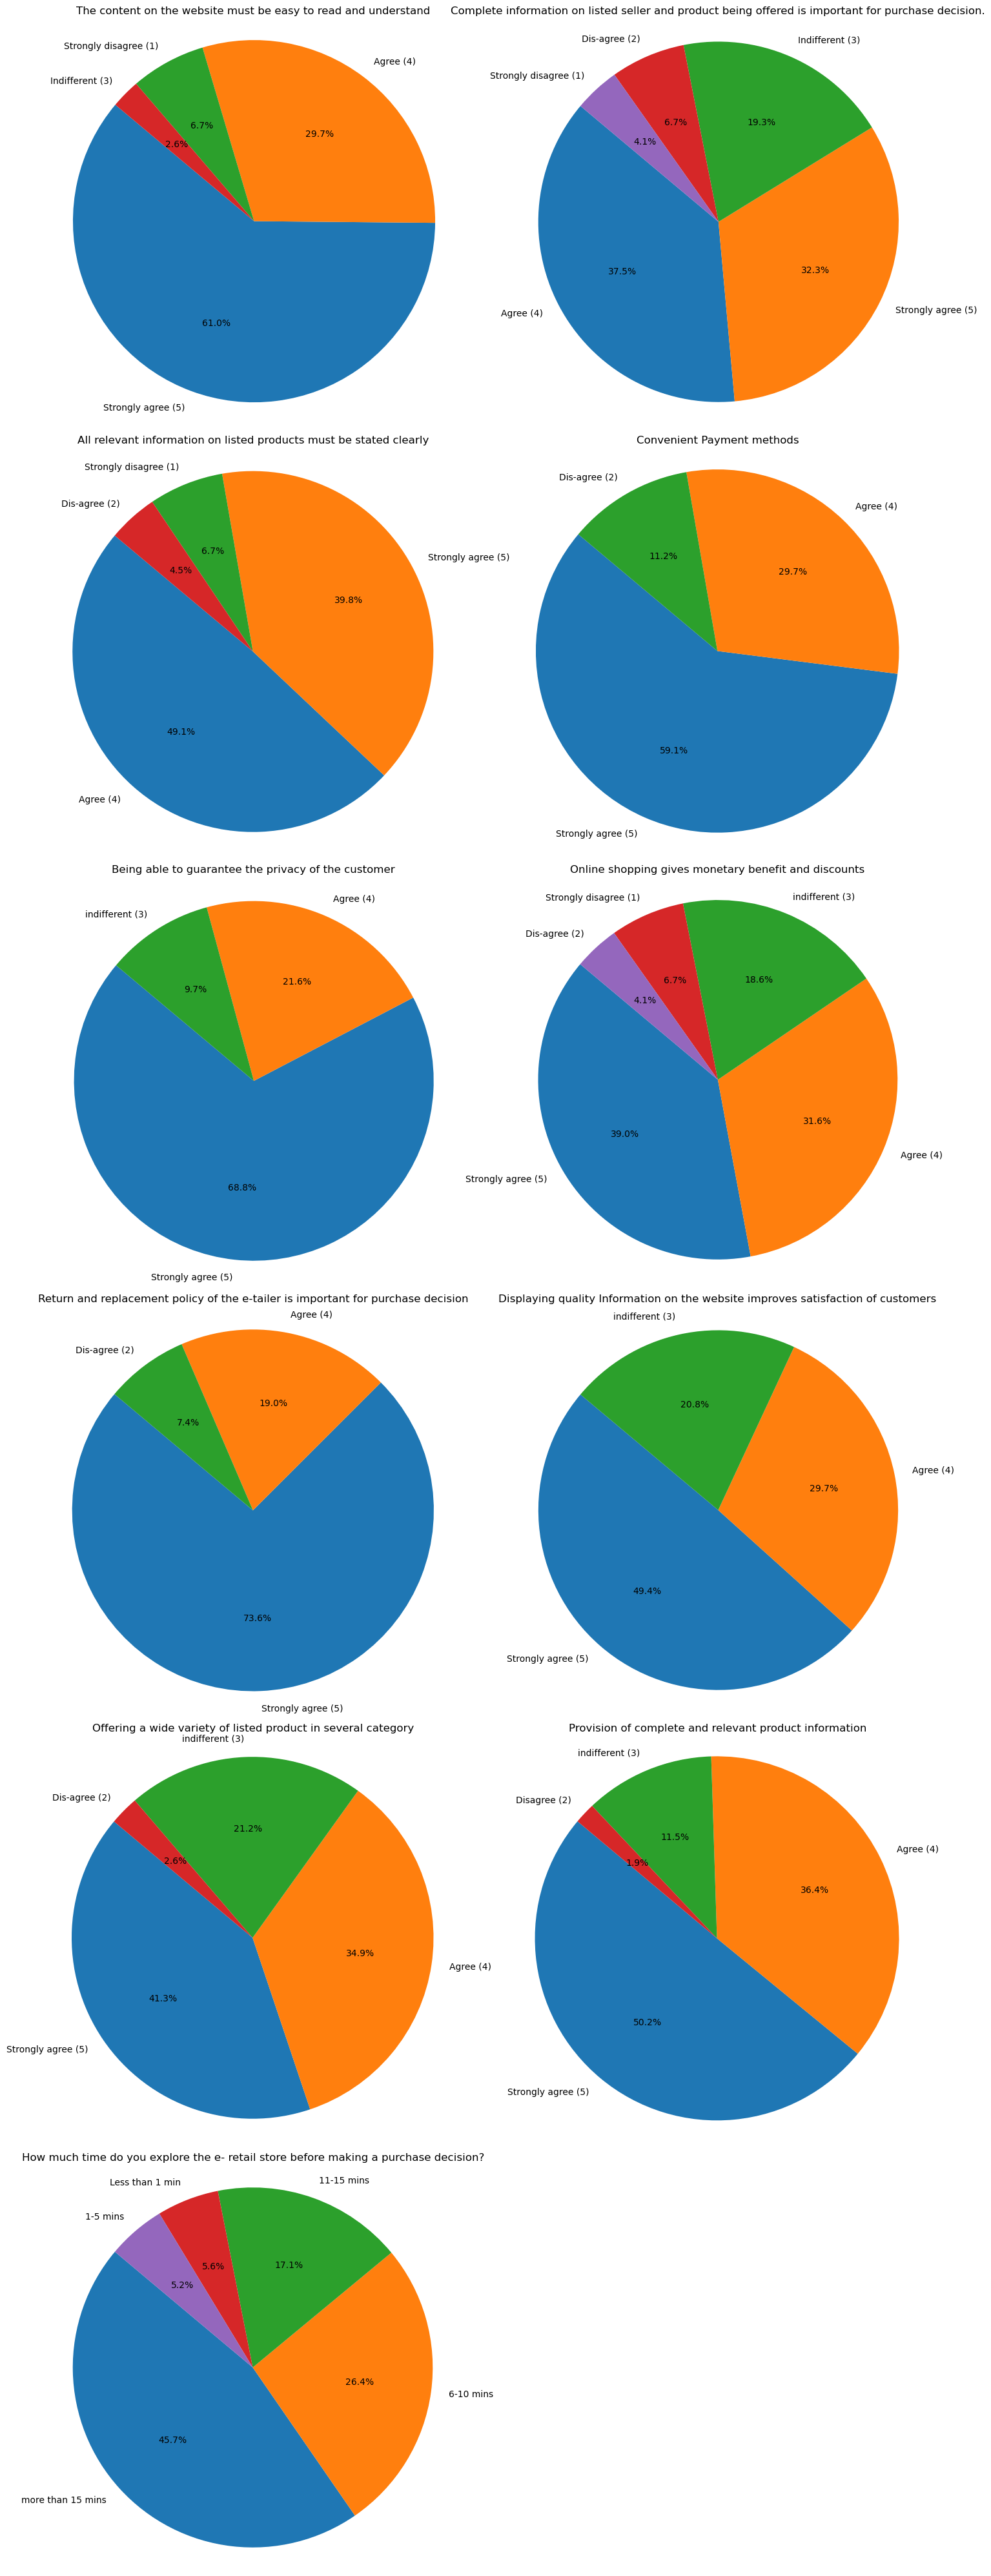

In [122]:
advice_columns = [
    'The content on the website must be easy to read and understand',
    'Complete information on listed seller and product being offered is important for purchase decision.',
    'All relevant information on listed products must be stated clearly',
    'Convenient Payment methods',
    'Being able to guarantee the privacy of the customer',
    'Online shopping gives monetary benefit and discounts',
    'Return and replacement policy of the e-tailer is important for purchase decision',
    'Displaying quality Information on the website improves satisfaction of customers',
    'Offering a wide variety of listed product in several category',
    'Provision of complete and relevant product information',
    'How much time do you explore the e- retail store before making a purchase decision?'
]

plt.figure(figsize=(15, 40))  # Increase the figure size to fit all the subplots
num_plots = len(advice_columns)
rows = num_plots // 2 + 1
for i, column in enumerate(advice_columns, 1):
    plt.subplot(rows, 2, i)
    counts = df[column].value_counts()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title(column)

plt.tight_layout()
plt.show()

1.The clarity and ease of the website's content are crucial for customers' understanding.

2.Providing complete information about the seller is essential for making informed purchase decisions.

3.Ensuring relevant product information is clear and easily accessible is imperative for customer satisfaction.

4.A user-friendly website interface enhances the overall shopping experience.

5.Offering convenient and secure payment methods boosts customer confidence in the platform.

6.Empathetic and prompt customer support is vital for resolving queries and concerns.

7.Guaranteeing customer privacy and data security fosters trust and loyalty.

8.Providing attractive discounts and benefits entices customers to make purchases.

9.Having a reliable return and replacement policy builds trust and encourages repeat purchases.

10.Displaying high-quality product images and information improves customer satisfaction.

11.Offering a wide variety of products in diverse categories caters to diverse customer preferences.

12.Providing comprehensive and relevant product descriptions helps customers make informed choices.

13.Customers typically spend around 15 minutes or more exploring the e-retail store before making a purchase decision.

In [70]:
# Create a copy of the original DataFrame and remove the target variable from the feature set
x = df.copy()
x.drop('Which of the Indian online retailer would you recommend to a friend?', axis=1, inplace=True)


In [71]:
# Separate the target variable from the DataFrame
y = df['Which of the Indian online retailer would you recommend to a friend?']


## Encoding Technique

In [72]:
# Identify categorical columns that need to be encoded
categorical_columns = [i for i in x.columns if x[i].dtypes == 'O']


In [73]:
# Initialize the encoders
encoder = OrdinalEncoder()
label_encoder = LabelEncoder()


In [74]:
# Encode the categorical columns in the feature set
for col in categorical_columns:
    x[col] = encoder.fit_transform(x[col].values.reshape(-1, 1))

# Encode the target variable using label encoding
y = label_encoder.fit_transform(y)


## Normalization techniques

In [75]:
# Perform MinMax scaling on the numerical features
num_cols = [i for i in x.columns if i not in categorical_columns]
scaler = MinMaxScaler()
x[num_cols] = scaler.fit_transform(x[num_cols])


## Train Test Split

In [77]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("The Shape of x_train:", x_train.shape)
print("The Shape of x_test:", x_test.shape)
print("The Shape of y_train:", y_train.shape)
print("The Shape of y_test:", y_test.shape)


The Shape of x_train: (215, 70)
The Shape of x_test: (54, 70)
The Shape of y_train: (215,)
The Shape of y_test: (54,)


## Model Selection

### Random Forest Classifier

In [78]:
# Build the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model on the training data
rf_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [79]:
# Make predictions using the trained Random Forest model
y_pred = rf_model.predict(x_test)

# Calculate precision, recall, F1 score, and support for each class
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred)

# Calculate overall accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Support:", support)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)


Precision: [1. 1. 1. 1. 1. 1. 1. 1.]
Recall: [1. 1. 1. 1. 1. 1. 1. 1.]
F1 Score: [1. 1. 1. 1. 1. 1. 1. 1.]
Support: [11 12  2 10  1  6 10  2]
Accuracy: 1.0
Confusion Matrix:
[[11  0  0  0  0  0  0  0]
 [ 0 12  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  6  0  0]
 [ 0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  2]]


### Decision Tree Classifier

In [82]:
# Initialize and train decision tree classifier
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

# Make predictions on the testing set
y_pred = tree.predict(x_test)

# Calculate accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Support:", support)
print("Accuracy:", accuracy)
print("Confusion Matrix:")

cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 1.0
Precision: [1. 1. 1. 1. 1. 1. 1. 1.]
Recall: [1. 1. 1. 1. 1. 1. 1. 1.]
F1 Score: [1. 1. 1. 1. 1. 1. 1. 1.]
Support: [11 12  2 10  1  6 10  2]
Accuracy: 1.0
Confusion Matrix:
[[11  0  0  0  0  0  0  0]
 [ 0 12  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  6  0  0]
 [ 0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  2]]


## Conclusion

1.Amazon.in and Flipkart.com are the most recommended and trusted e-commerce brands, indicating their strong market presence.
  while other e commerce companies needs to focus on improving customer satisfaction and trust to compete with other top e-       commerce platforms.
  
2.Content quality and accurate product descriptions are crucial for customer satisfaction and trust.

3.Continuous improvement in website and application design can enhance user experience and satisfaction.

4.Employing search engine optimization (SEO) strategies can increase online visibility and reach more potential customers.

5.Strategies to attract younger audiences and increase their engagement should be explored.

6.Focus marketing efforts on top cities like Delhi, Greater Noida, Noida, and Bangalore.

7.Enhance user experience for higher customer satisfaction and retention.

8.Optimize website performance and payment options during promotional periods.

9.Utilize social media platforms to reach and engage with customers.

10.Offer convenient payment options like credit/debit cards and cash on delivery.


## Thanku